In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

In [2]:
df = pd.read_csv("Employee_Attrition.csv")


df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1323.000000  1323.000000       1323.000000  1323.000000    1323.000000   
mean     36.635268   802.030050          9.091097     2.923447       0.999325   
std       9.882161   414.031025          8.177870     1.072203       0.099656   
min      14.544608    86.828045          0.750112     0.770362       0.628985   
25%      29.624982   456.479553          2.147069     2.122706       0.931146   
50%      34.951950   782.958705          6.920808     3.015658       0.998949   
75%      42.748741  1130.577949         13.584900     3.700560       1.067371   
max      69.402515  1784.394456         33.684424     6.285161       1.290613   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1323.000000              1323.000000  1323.000000     1323.000000   
mean      1026.679166                 2.726443    65.647722        2.743028   
std        610.480802                 1.129679    21.469709        0.765568   
min          1.054148                 0.759655    23.855272        0.722008   
25%        501.854842                 1.894818    47.701897        2.177638   
50%       1022.025017                 2.887313    64.934490        2.859143   
75%       1533.811096                 3.676600    83.038355        3.179128   
max       2530.919375                 5.254672   123.200439        5.241968   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1323.000000  ...               1323.000000    1323.000000   
mean      2.058270  ...                  2.720431      80.241313   
std       1.127018  ...                  1.115959       8.022535   
min       0.715172  ...                  0.720696      53.793059   
25%       1.045228  ...                  1.909010      74.882946   
50%       1.936150  ...                  2.891235      80.351400   
75%       2.609707  ...                  3.639961      85.664169   
max       5.942269  ...                  5.092280     107.378705   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1323.000000        1323.000000            1323.000000   
mean           0.814757          11.426152               2.811756   
std            0.863076           8.075870               1.329044   
min            0.000000           0.000000               0.000000   
25%            0.000000           5.953221               1.967328   
50%            0.913651           9.306742               2.690934   
75%            1.082523          15.324548               3.366949   
max            3.474319          47.641892               7.503201   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1323.000000     1323.000000         1323.000000   
mean          2.762825        6.933624            4.233363   
std           0.761802        6.046798            3.658111   
min           0.799138        0.000000            0.000000   
25%           2.193390        2.673269            1.824392   
50%           2.899807        5.422160            2.968874   
75%           3.206117        9.238005            7.052591   
max           4.856086       36.848408           19.091844   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1323.000000           1323.000000  
mean                  2.160710              4.117695  
std                   3.221481              3.594053  
min                   0.000000              0.000000  
25%                   0.000000              1.687177  
50%                   0.967140              2.939240  
75%                   2.586631              6.987964  
max                  17.273662             19.976003  

[8 rows x 26 columns]

In [3]:
df.head(20)

Age Attrition     BusinessTravel    DailyRate  \
0   41.920786       Yes      Travel_Rarely   990.110009   
1   51.589037        No  Travel_Frequently   276.776030   
2   33.131540       Yes      Travel_Rarely  1204.158501   
3   34.707073        No  Travel_Frequently  1352.752432   
4   24.790188        No      Travel_Rarely   485.053333   
5   29.766336        No  Travel_Frequently   900.495555   
6   61.934723       NaN                NaN  1284.456352   
7   27.098235        No      Travel_Rarely          NaN   
8   30.379999       NaN  Travel_Frequently   195.346240   
9   35.373614        No      Travel_Rarely  1277.914019   
10        NaN        No      Travel_Rarely   715.066864   
11  25.051455        No      Travel_Rarely          NaN   
12  27.897415        No                NaN   710.904023   
13  33.004799        No      Travel_Rarely  1517.124932   
14  27.331187       Yes      Travel_Rarely   127.376947   
15  28.317944        No      Travel_Rarely  1473.048900   
16  34.734355        No      Travel_Rarely   353.957728   
17  21.114727        No         Non-Travel  1120.735985   
18  59.586096       NaN      Travel_Rarely   933.028516   
19        NaN        No      Travel_Rarely          NaN   

                Department  DistanceFromHome  Education    EducationField  \
0                    Sales          1.016716   1.770313     Life Sciences   
1   Research & Development               NaN   1.035333     Life Sciences   
2   Research & Development          2.198662   2.118801             Other   
3                    Sales          2.937851   3.670674     Life Sciences   
4   Research & Development          1.988953   1.120496           Medical   
5   Research & Development          1.805415        NaN     Life Sciences   
6   Research & Development          2.502578        NaN           Medical   
7   Research & Development         22.329189   0.923262     Life Sciences   
8   Research & Development               NaN   3.209049     Life Sciences   
9   Research & Development         28.618060   3.144818  Technical Degree   
10                     NaN         13.763230   3.106259           Medical   
11  Research & Development         15.403733   2.491854     Life Sciences   
12  Research & Development         27.705716   1.133507     Life Sciences   
13  Research & Development         16.212251   2.246097               NaN   
14                   Sales         25.075108   3.304323     Life Sciences   
15  Research & Development         18.685474   4.213186     Life Sciences   
16  Research & Development          6.185996   2.044947     Life Sciences   
17  Research & Development         15.558079   2.458083           Medical   
18                   Sales          1.738537   4.138086     Life Sciences   
19  Research & Development          2.028058   3.569300               NaN   

    EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
0        1.033298        1.054148  ...                  1.012832   
1        0.944859        2.107031  ...                  4.312008   
2        0.810809        4.008125  ...                  2.332558   
3        0.822976        4.587269  ...                  3.029591   
4             NaN        7.228740  ...                       NaN   
5        0.911961        8.434914  ...                  2.798835   
6        0.842456       11.019992  ...                  0.809695   
7        0.888357       10.066385  ...                  2.062221   
8        0.834966       13.496344  ...                  2.156785   
9             NaN       12.351803  ...                  1.933506   
10       0.917946       15.269356  ...                       NaN   
11       1.004638       14.255886  ...                  4.090314   
12       1.093200       15.268397  ...                       NaN   
13       1.029653       16.705473  ...                  3.105731   
14       1.054416       17.554695  ...                  2.161141   
15       0.962107       20.557561  ...                  3.108163

In [4]:
# Check for null
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [5]:
(df.isnull().sum()/(len(df)))*100

Age                         10.0
Attrition                   10.0
BusinessTravel              10.0
DailyRate                   10.0
Department                  10.0
DistanceFromHome            10.0
Education                   10.0
EducationField              10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
Gender                      10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobRole                     10.0
JobSatisfaction             10.0
MaritalStatus               10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
Over18                      10.0
OverTime                    10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBa

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
#dropping columns
df = df.drop(['EmployeeNumber', 'Over18', 'DailyRate', 'HourlyRate', 'MonthlyRate'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   Department                1323 non-null   object 
 4   DistanceFromHome          1323 non-null   float64
 5   Education                 1323 non-null   float64
 6   EducationField            1323 non-null   object 
 7   EmployeeCount             1323 non-null   float64
 8   EnvironmentSatisfaction   1323 non-null   float64
 9   Gender                    1323 non-null   object 
 10  JobInvolvement            1323 non-null   float64
 11  JobLevel                  1323 non-null   float64
 12  JobRole                   1323 non-null   object 
 13  JobSatisfaction           1323 non-null   float64
 14  MaritalS

# Attrition column

In [8]:
print(df['Attrition'].head())

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


In [9]:
#Assessing the 'Attrition' Column and dealing with the missing values
attrition_values = df['Attrition'].unique()

print("Unique values in the 'Attrition' column:", attrition_values)



Unique values in the 'Attrition' column: ['Yes' 'No' nan]


In [10]:
target_column = 'Attrition'
majority_class = df[target_column].value_counts().idxmax()

print(f"The majority class in the '{target_column}' column is: {majority_class}")

The majority class in the 'Attrition' column is: No


In [11]:
# will replace NaN value in Attrition with value No as it is the majority class  
df['Attrition'].fillna('No', inplace=True)

# Print the head of the 'Attrition' column
print(df['Attrition'].head())



0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


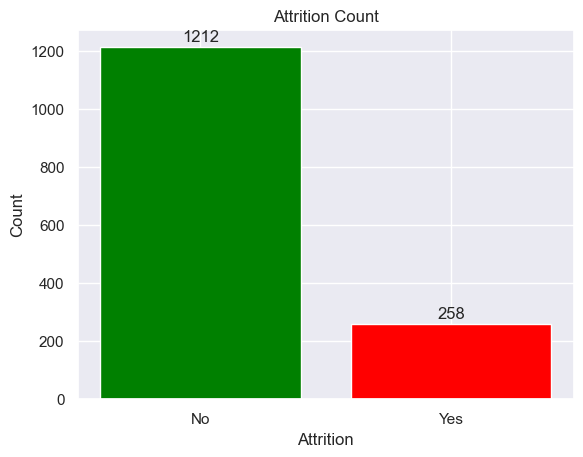

In [12]:

# Count the occurrences of each value in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plot a bar chart
plt.bar(attrition_counts.index, attrition_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')

# Add annotations
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Gender

In [13]:
#Follow the same process for 'Gender'
print(df['Gender'].head(20))

0       Male
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7       Male
8       Male
9       Male
10      Male
11    Female
12       NaN
13      Male
14      Male
15       NaN
16      Male
17      Male
18    Female
19      Male
Name: Gender, dtype: object


In [14]:
#Assessing the 'Gender' Column and dealing with the missing values
gender_values = df['Gender'].unique()

print("Unique values in the 'Gender' column:", gender_values)



Unique values in the 'Gender' column: ['Male' 'Female' nan]


In [15]:
target_column = 'Gender'
majority_class = df[target_column].value_counts().idxmax()

print(f"The majority class in the '{target_column}' column is: {majority_class}")

The majority class in the 'Gender' column is: Male


In [16]:
# will replace NaN value in Gender with value Male as it is the majority class  
df['Gender'].fillna('Male', inplace=True)
# Print the updated Attrition column
print(df['Gender'].head())


0      Male
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object


In [17]:
print(df['Gender'].head(20))

0       Male
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7       Male
8       Male
9       Male
10      Male
11    Female
12      Male
13      Male
14      Male
15      Male
16      Male
17      Male
18    Female
19      Male
Name: Gender, dtype: object


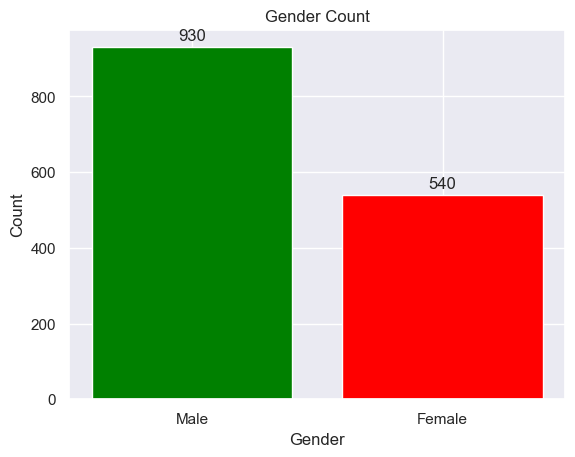

In [18]:
# Count the occurrences of each value in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Plot a bar chart
plt.bar(gender_counts.index, gender_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

# Add annotations
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Dealing with the missing values in categorical features

In [19]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [20]:
# Replace missing values for categorical columns with their respective modes
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [21]:
# Check for null
df.isnull().sum()

Age                         147
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome            147
Education                   147
EducationField                0
EmployeeCount               147
EnvironmentSatisfaction     147
Gender                        0
JobInvolvement              147
JobLevel                    147
JobRole                       0
JobSatisfaction             147
MaritalStatus                 0
MonthlyIncome               147
NumCompaniesWorked          147
OverTime                      0
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtCompany              147
YearsInCurrentRole          147
YearsSinceLastPromotion     147
YearsWithCurrManager        147
dtype: int64

# Dealing with missing values for Non-Categorical features

In [22]:
non_categorical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

print("Non-categorical columns:", non_categorical_columns)


Non-categorical columns: ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


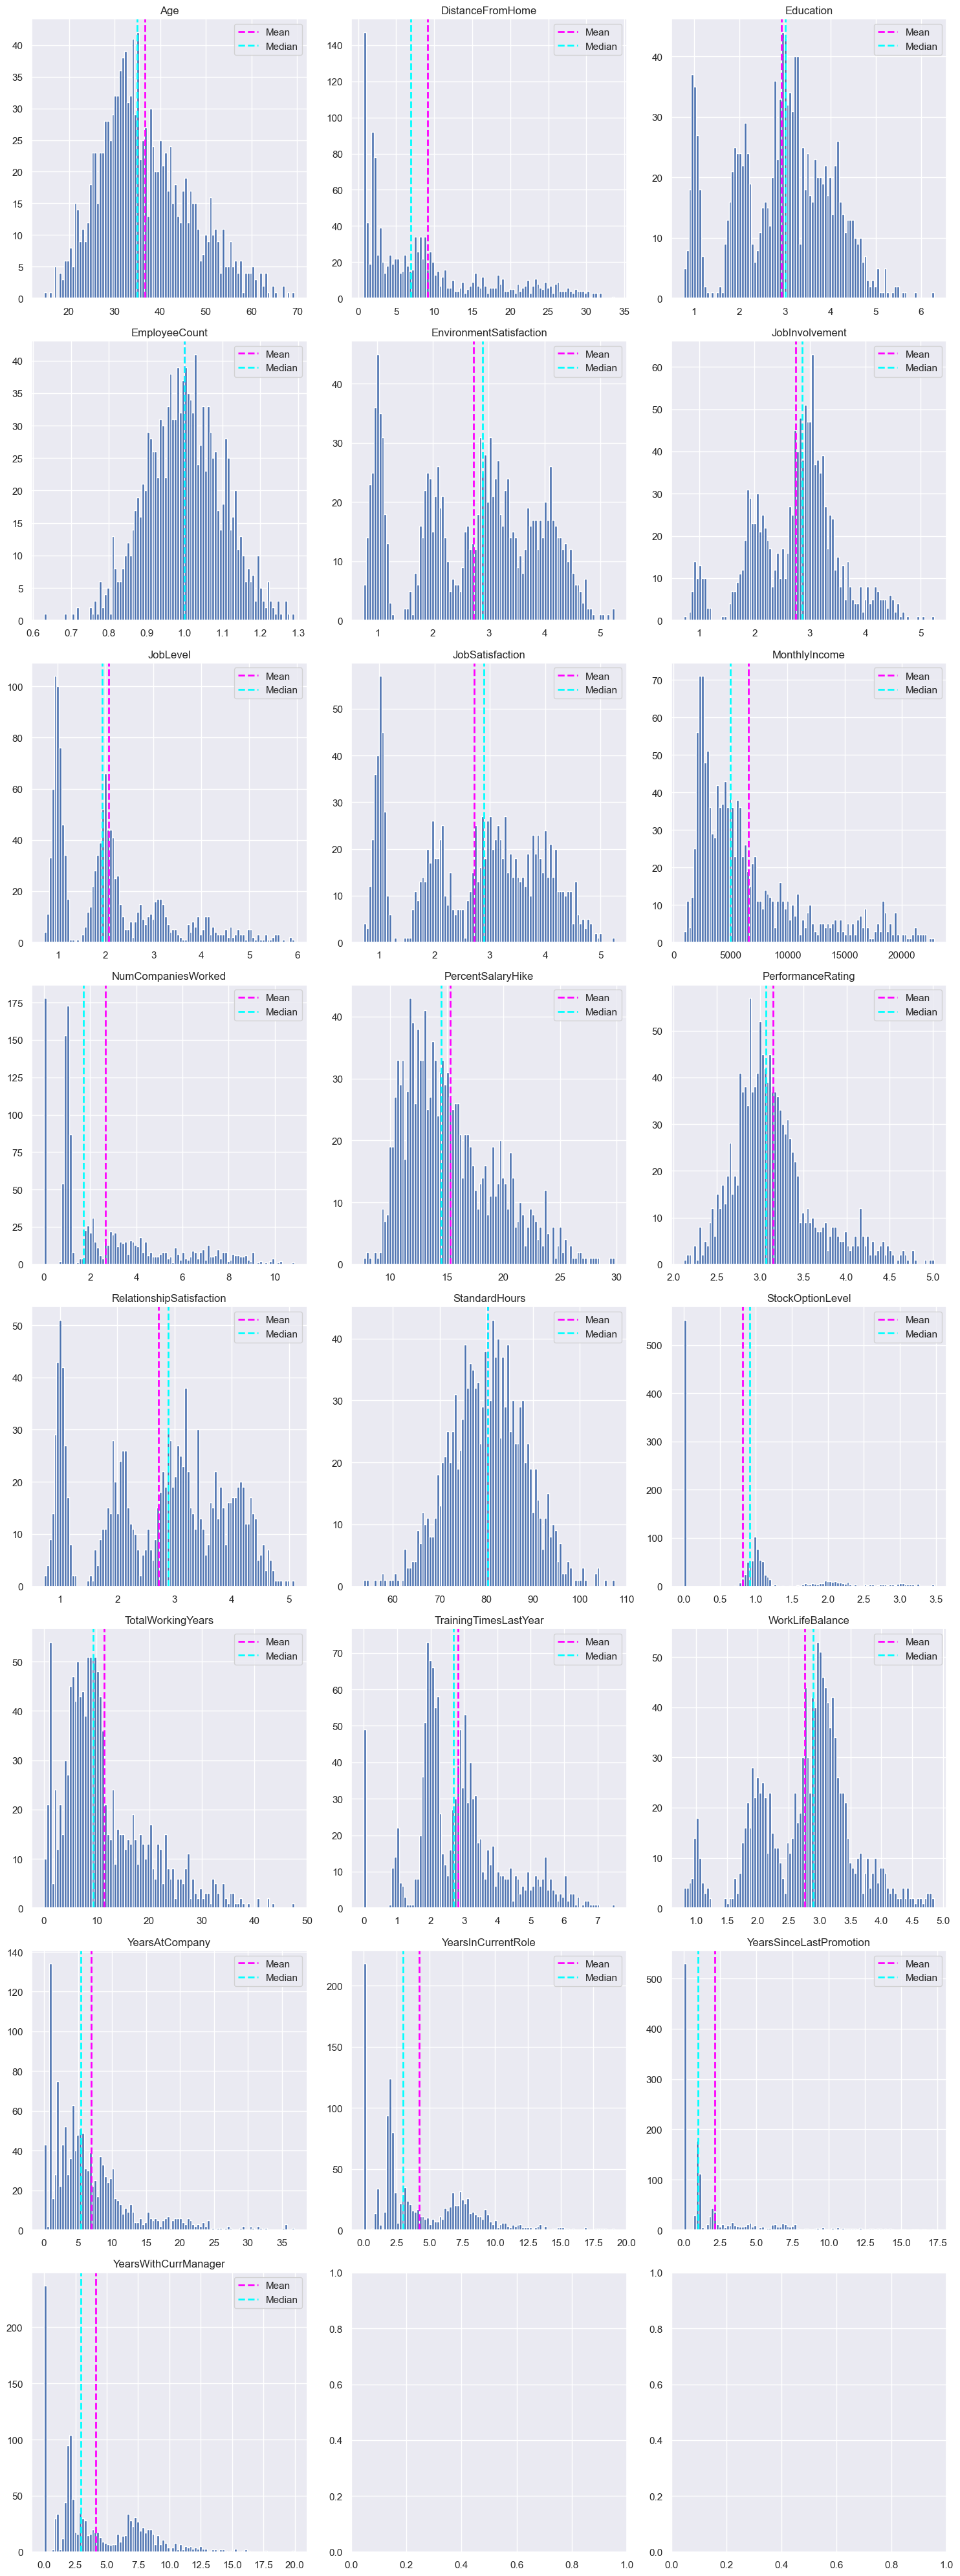

In [23]:
#Creating histograms to visualise normality/skewedness of data 

# Get all numeric features
numeric_features = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots, the goal here is to visually arrange the subplots nicely.
num_rows = (len(numeric_features) + 2) // 3
num_cols = min(len(numeric_features), 3)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for each numeric feature
for i, col in enumerate(numeric_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

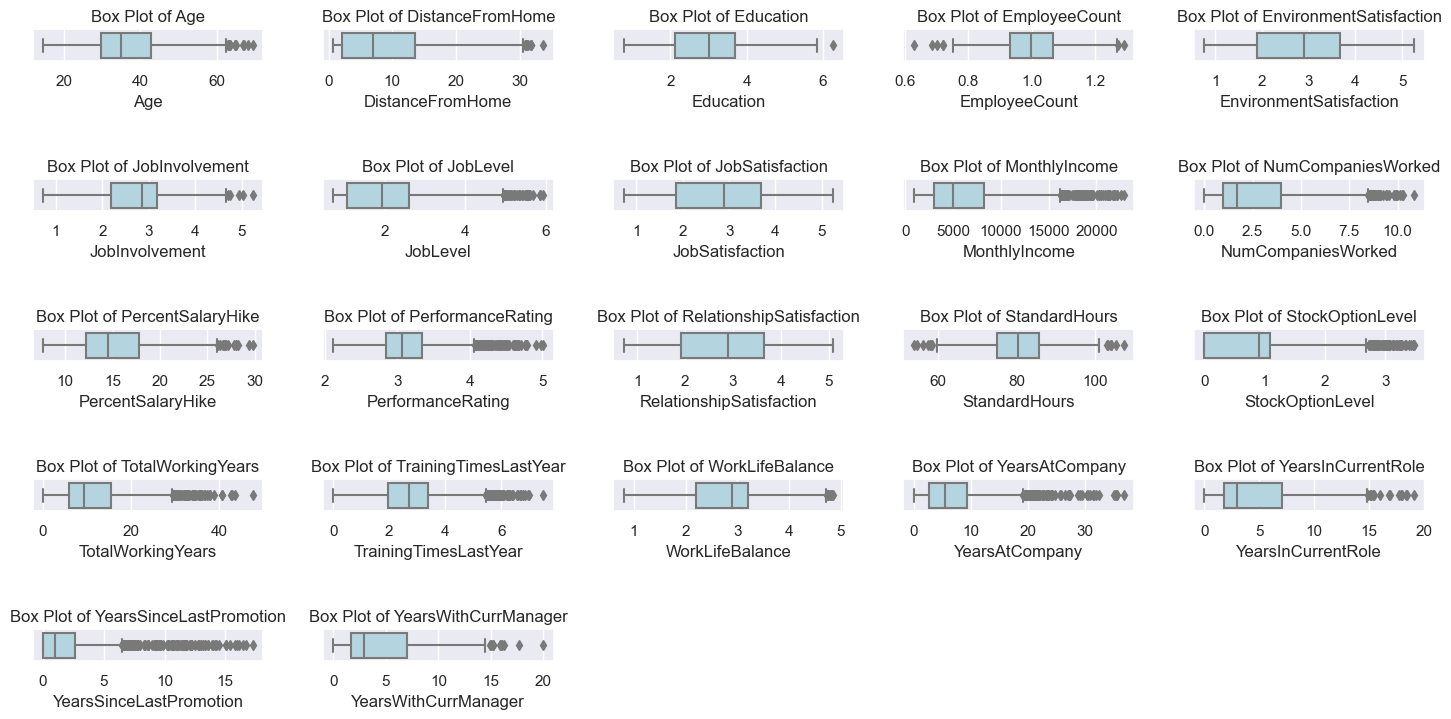

In [24]:
#Creating boxplots to visualise outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns)
numerical_columns = df[['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Create subplots for numerical features
num_rows = 5
num_cols = len(numerical_columns.columns) // num_rows + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=col, data=df, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(num_cols * num_rows):
    if j >= len(numerical_columns.columns):
        axes[j].axis('off')

plt.tight_layout(pad=3)
plt.show()

In [25]:
#Using the mean to impute missing values in numerical columns with no significant outliers
from sklearn.impute import SimpleImputer

columns_to_impute = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']

# Create a subset of the DataFrame with only the columns to impute
df_subset = df[columns_to_impute]

# Use SimpleImputer to impute missing values with the mean for the specified columns
my_imputer = SimpleImputer(strategy='mean')
df_subset_imputed = pd.DataFrame(my_imputer.fit_transform(df_subset), columns=columns_to_impute)

# Update the original DataFrame with the imputed values
df[columns_to_impute] = df_subset_imputed


In [26]:
#Using the median to impute missing values in numerical columns with significant outliers
from sklearn.impute import SimpleImputer

columns_to_impute = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create a subset of the DataFrame with only the columns to impute
df_subset = df[columns_to_impute]

# Use SimpleImputer to impute missing values with the mean for the specified columns
my_imputer = SimpleImputer(strategy='median')
df_subset_imputed = pd.DataFrame(my_imputer.fit_transform(df_subset), columns=columns_to_impute)

# Update the original DataFrame with the imputed values
df[columns_to_impute] = df_subset_imputed


In [27]:
# Check for null
df_subset_imputed.isnull().sum()

Age                        0
DistanceFromHome           0
Education                  0
EmployeeCount              0
JobInvolvement             0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

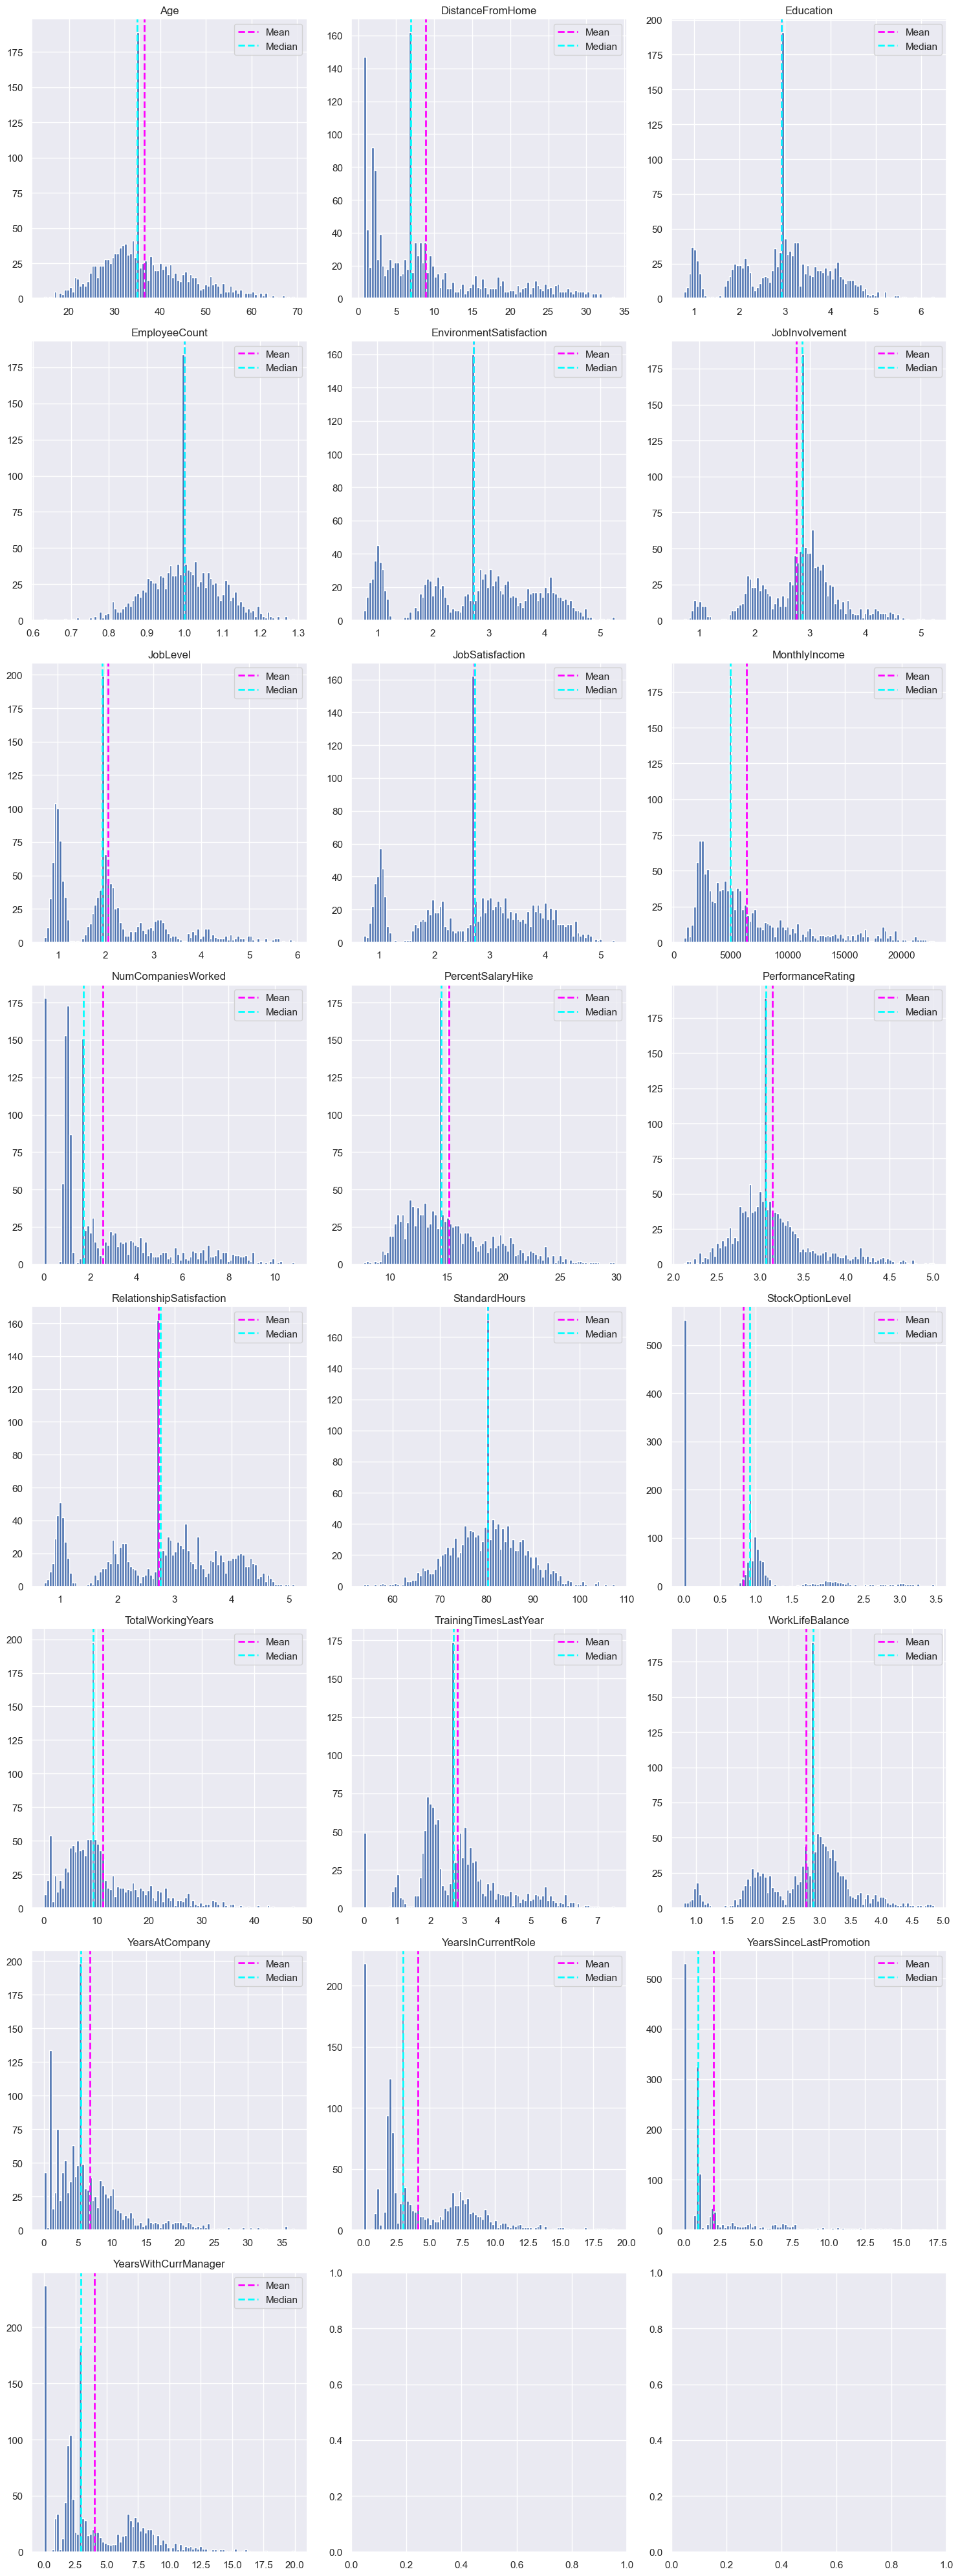

In [28]:
#Creating histograms to visualise normality/skewedness of data 

# Get all numeric features
numeric_features = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots, the goal here is to visually arrange the subplots nicely.
num_rows = (len(numeric_features) + 2) // 3
num_cols = min(len(numeric_features), 3)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for each numeric feature
for i, col in enumerate(numeric_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
df.head(20)

Age Attrition     BusinessTravel              Department  \
0   41.920786       Yes      Travel_Rarely                   Sales   
1   51.589037        No  Travel_Frequently  Research & Development   
2   33.131540       Yes      Travel_Rarely  Research & Development   
3   34.707073        No  Travel_Frequently                   Sales   
4   24.790188        No      Travel_Rarely  Research & Development   
5   29.766336        No  Travel_Frequently  Research & Development   
6   61.934723        No      Travel_Rarely  Research & Development   
7   27.098235        No      Travel_Rarely  Research & Development   
8   30.379999        No  Travel_Frequently  Research & Development   
9   35.373614        No      Travel_Rarely  Research & Development   
10  34.951950        No      Travel_Rarely  Research & Development   
11  25.051455        No      Travel_Rarely  Research & Development   
12  27.897415        No      Travel_Rarely  Research & Development   
13  33.004799        No      Travel_Rarely  Research & Development   
14  27.331187       Yes      Travel_Rarely                   Sales   
15  28.317944        No      Travel_Rarely  Research & Development   
16  34.734355        No      Travel_Rarely  Research & Development   
17  21.114727        No         Non-Travel  Research & Development   
18  59.586096        No      Travel_Rarely                   Sales   
19  34.951950        No      Travel_Rarely  Research & Development   

    DistanceFromHome  Education    EducationField  EmployeeCount  \
0           1.016716   1.770313     Life Sciences       1.033298   
1           6.920808   1.035333     Life Sciences       0.944859   
2           2.198662   2.118801             Other       0.810809   
3           2.937851   3.670674     Life Sciences       0.822976   
4           1.988953   1.120496           Medical       0.998949   
5           1.805415   2.923447     Life Sciences       0.911961   
6           2.502578   2.923447           Medical       0.842456   
7          22.329189   0.923262     Life Sciences       0.888357   
8           6.920808   3.209049     Life Sciences       0.834966   
9          28.618060   3.144818  Technical Degree       0.998949   
10         13.763230   3.106259           Medical       0.917946   
11         15.403733   2.491854     Life Sciences       1.004638   
12         27.705716   1.133507     Life Sciences       1.093200   
13         16.212251   2.246097     Life Sciences       1.029653   
14         25.075108   3.304323     Life Sciences       1.054416   
15         18.685474   4.213186     Life Sciences       0.962107   
16          6.185996   2.044947     Life Sciences       0.893911   
17         15.558079   2.458083           Medical       0.998949   
18          1.738537   4.138086     Life Sciences       1.097197   
19          2.028058   3.569300     Life Sciences       1.080372   

    EnvironmentSatisfaction  Gender  ...  RelationshipSatisfaction  \
0                  2.146294    Male  ...                  1.012832   
1                  3.470803    Male  ...                  4.312008   
2                  3.979420    Male  ...                  2.332558   
3                  3.734705  Female  ...                  3.029591   
4                  1.079412    Male  ...                  2.720431   
5                  4.198522    Male  ...                  2.798835   
6                  2.845946  Female  ...                  0.809695   
7                  3.194771    Male  ...                  2.062221   
8                  4.205716    Male  ...                  2.156785   
9                  2.726443    Male  ...                  1.933506   
10                 0.867072    Male  ...                  2.720431   
11                 3.478816  Female  ...                  4.090314   
12                 1.114828    Male  ...                  2.720431   
13                 2.026841    Male  ...                  3.105731   
14                 3.092239    Male  ...                  2.

In [30]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values of  EducationField {'Other', 'Marketing', 'Life Sciences', 'Medical', 'Technical Degree', 'Human Resources'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Laboratory Technician', 'Manager', 'Sales Executive', 'Research Director', 'Healthcare Representative', 'Research Scientist', 'Sales Representative', 'Human Resources', 'Manufacturing Director'}
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of  OverTime {'Yes', 'No'}


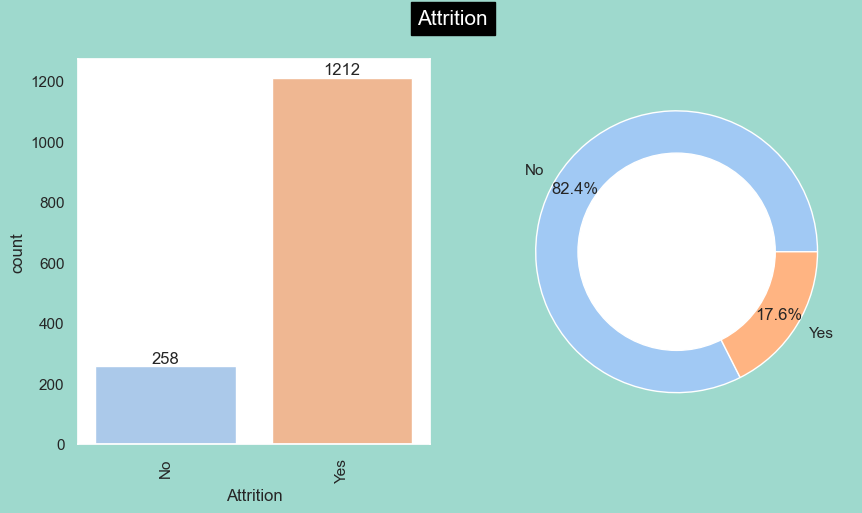

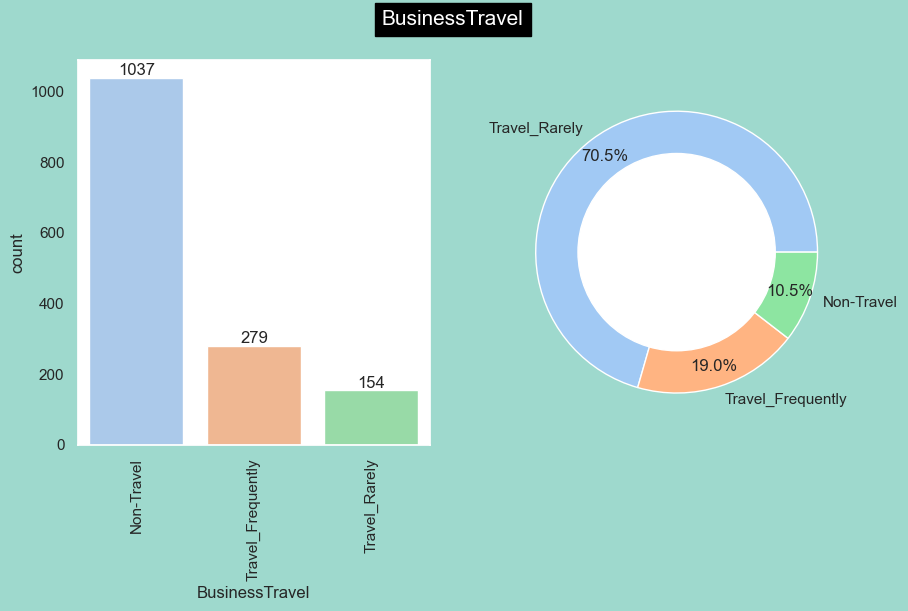

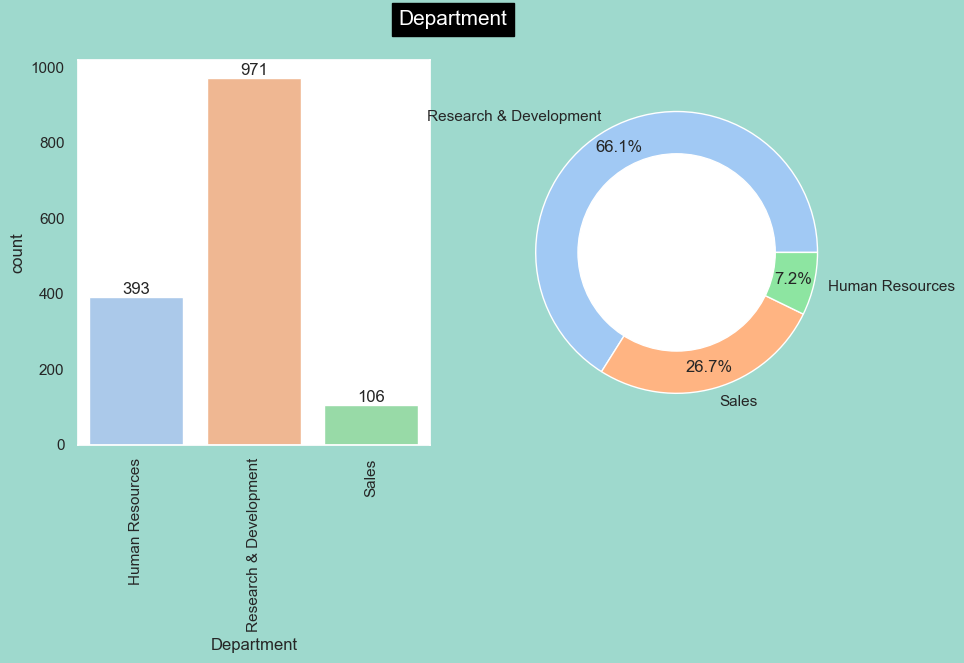

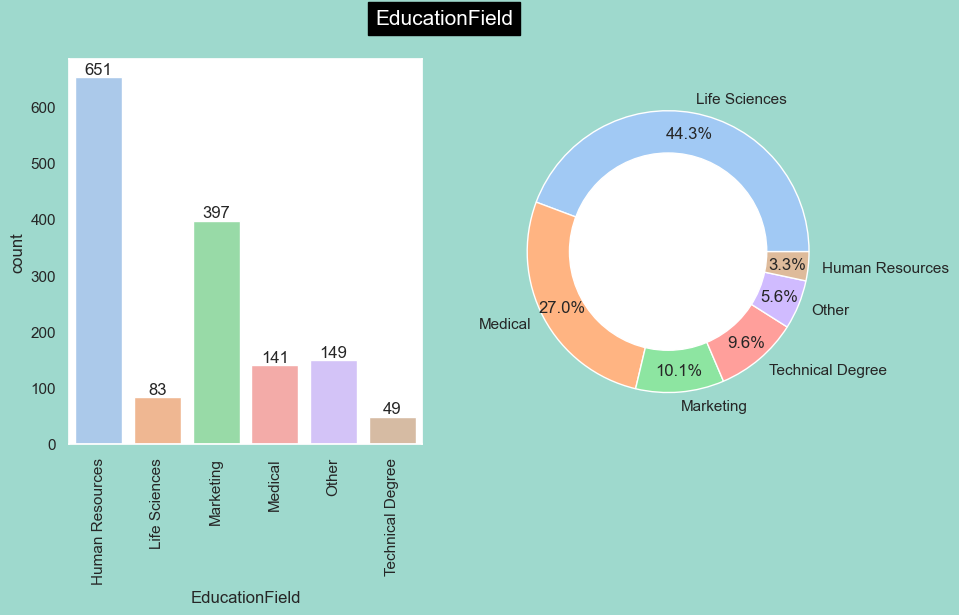

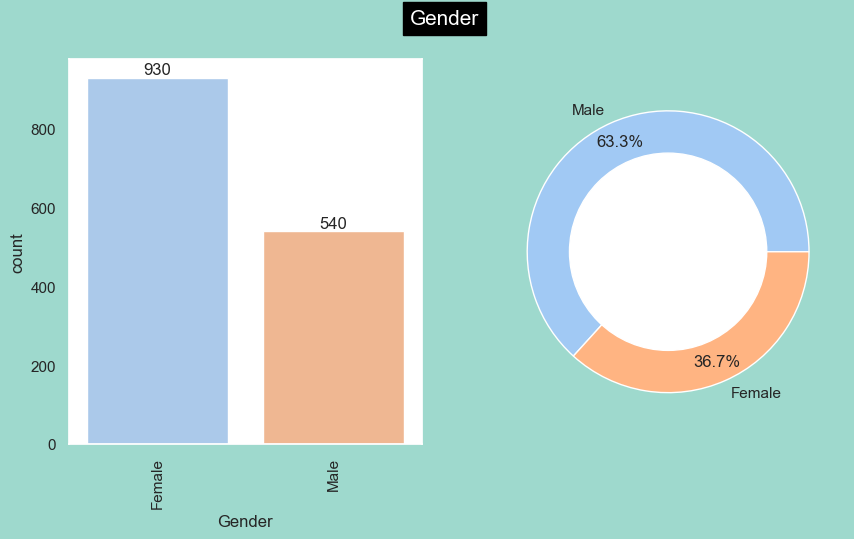

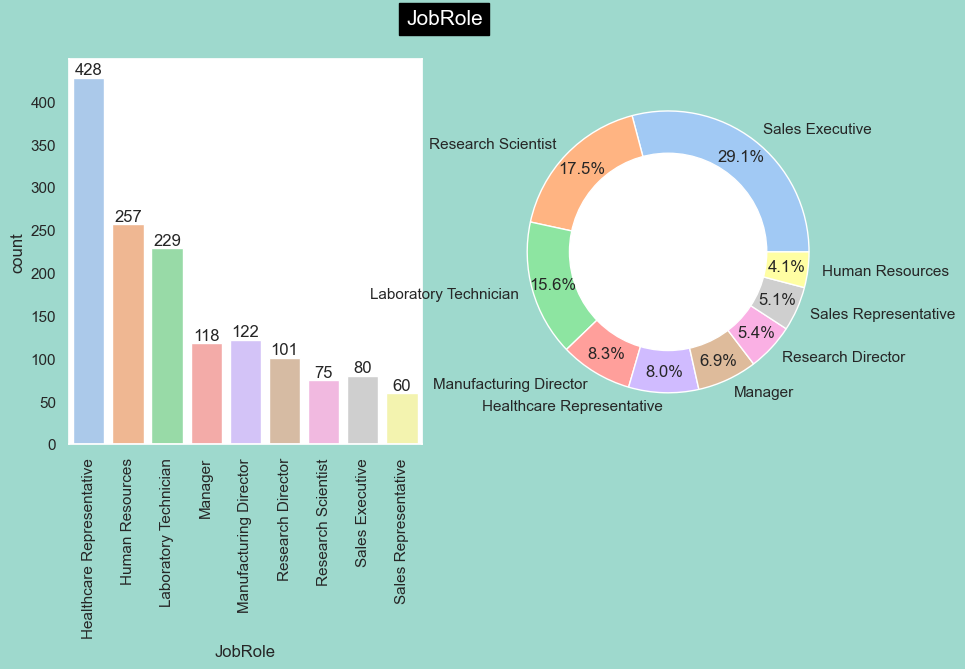

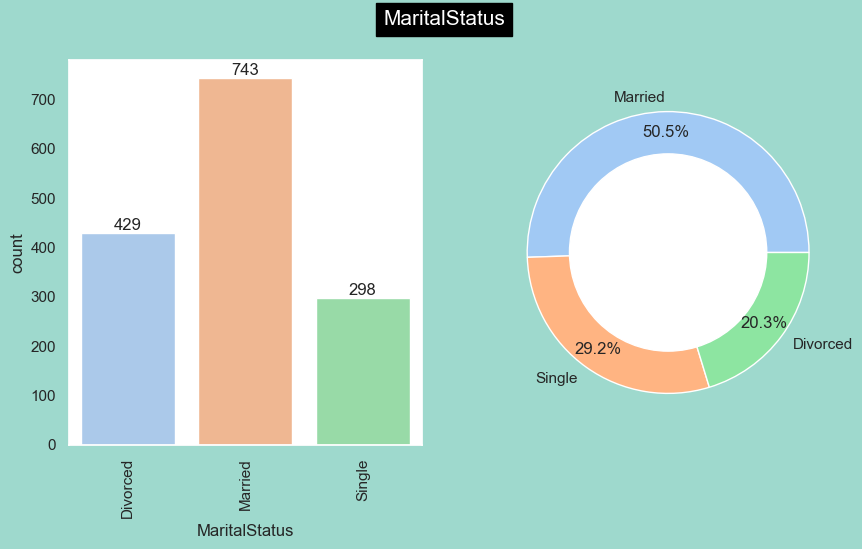

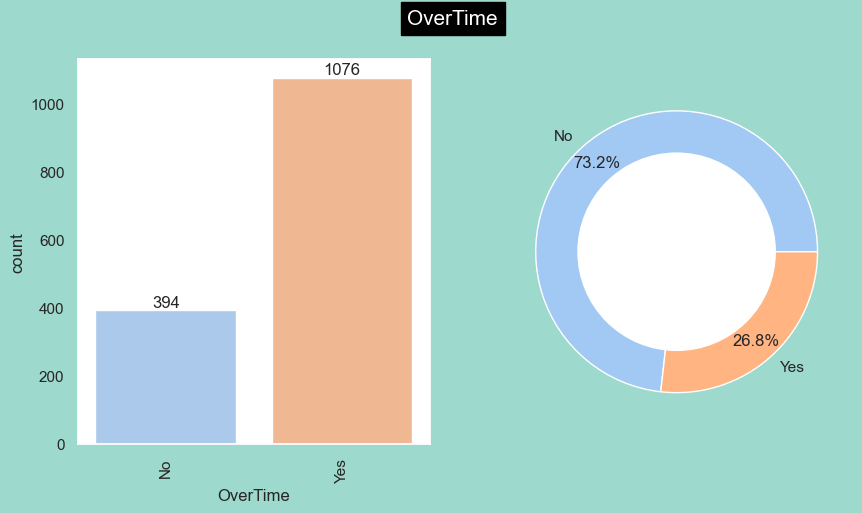

In [31]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)
    
    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    #count of col (pie chart)
    
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

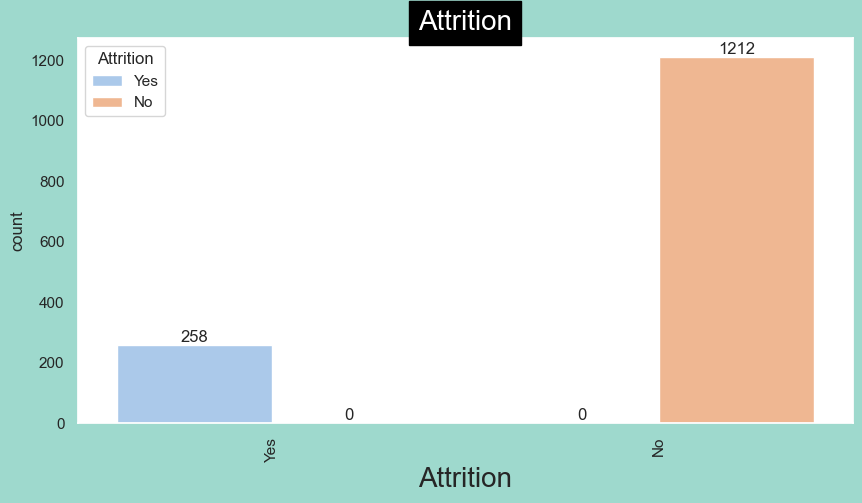

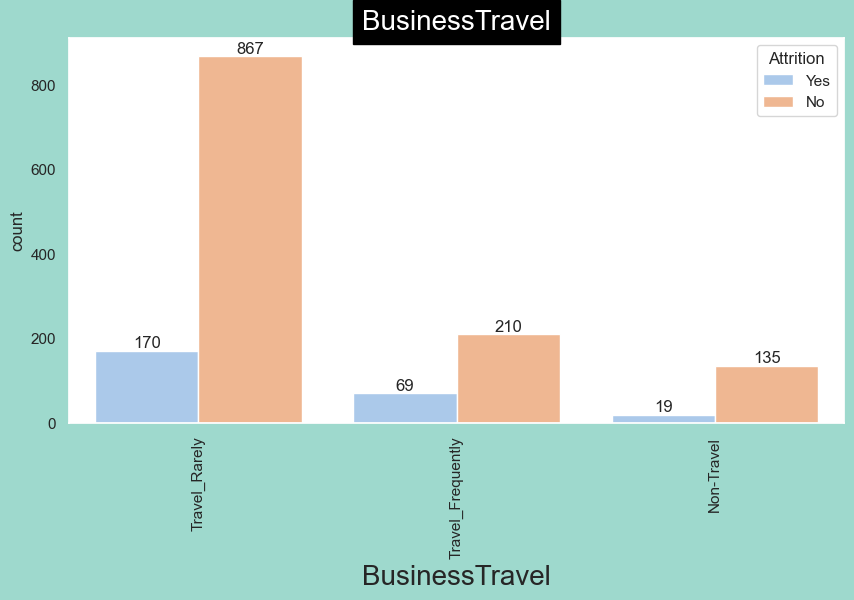

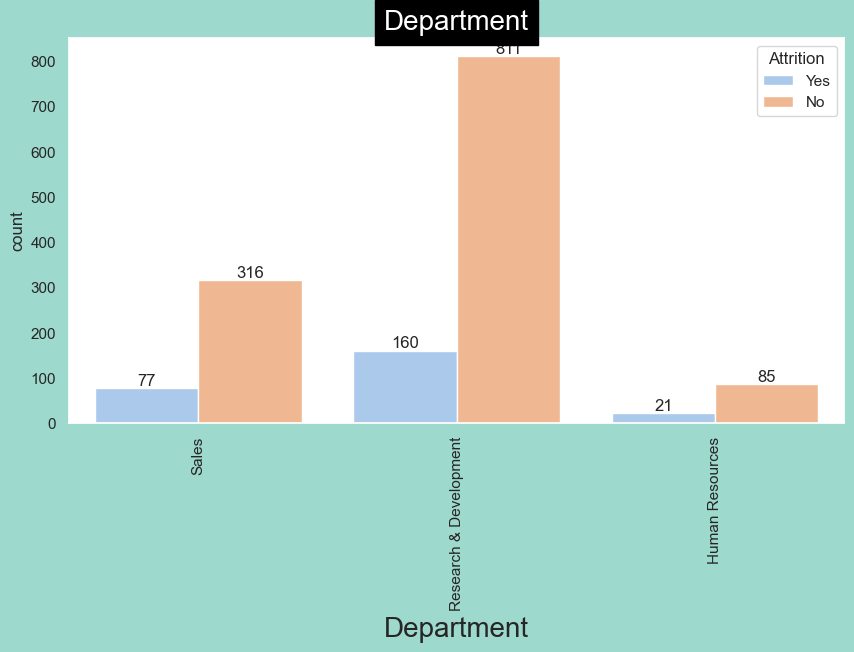

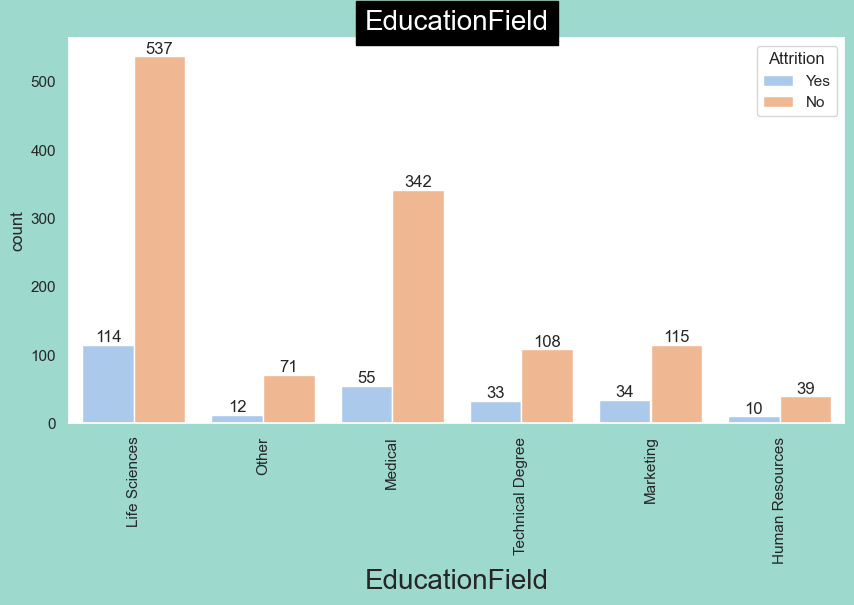

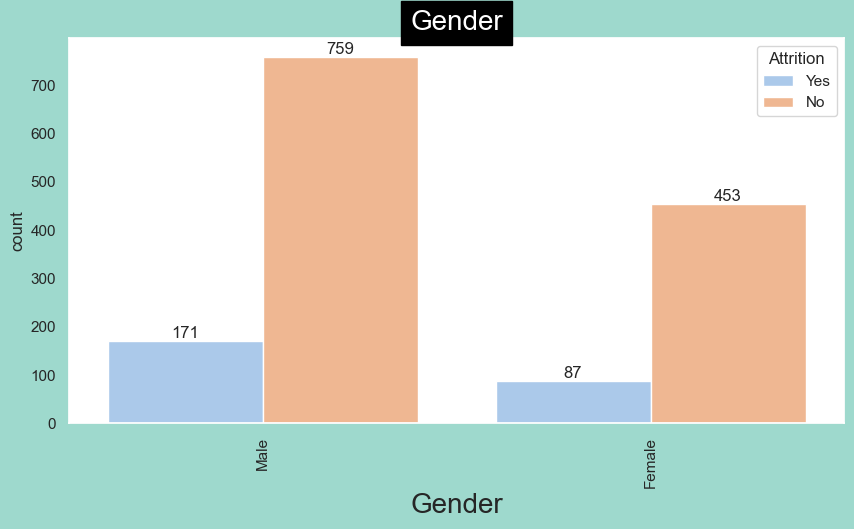

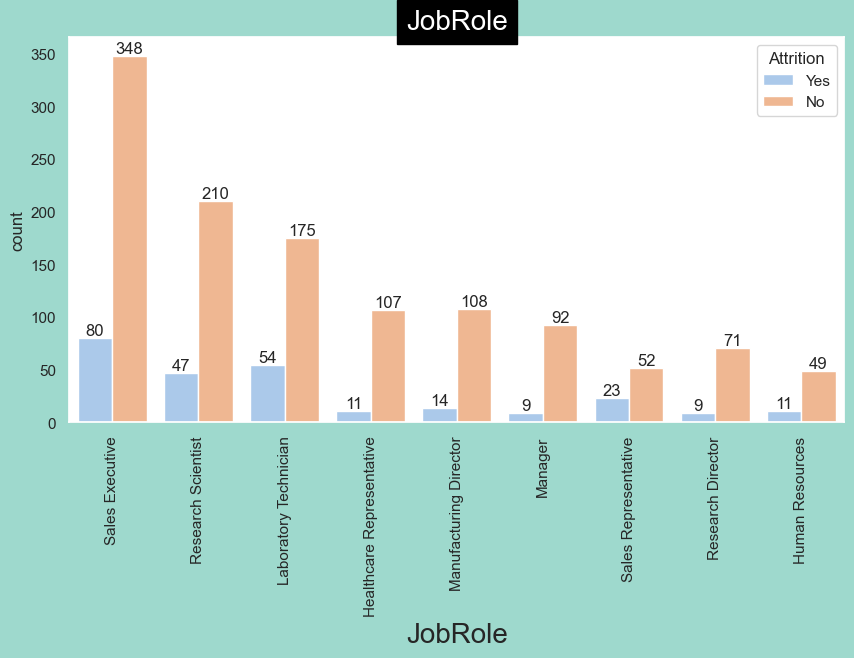

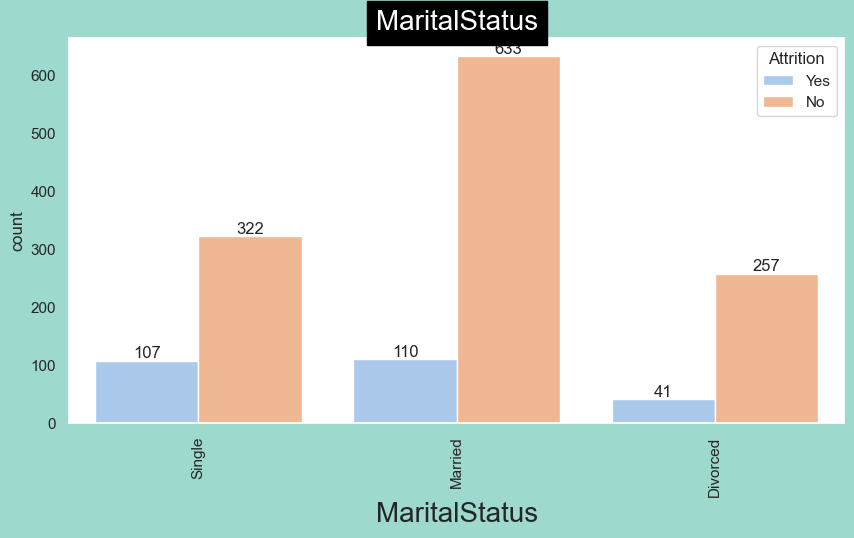

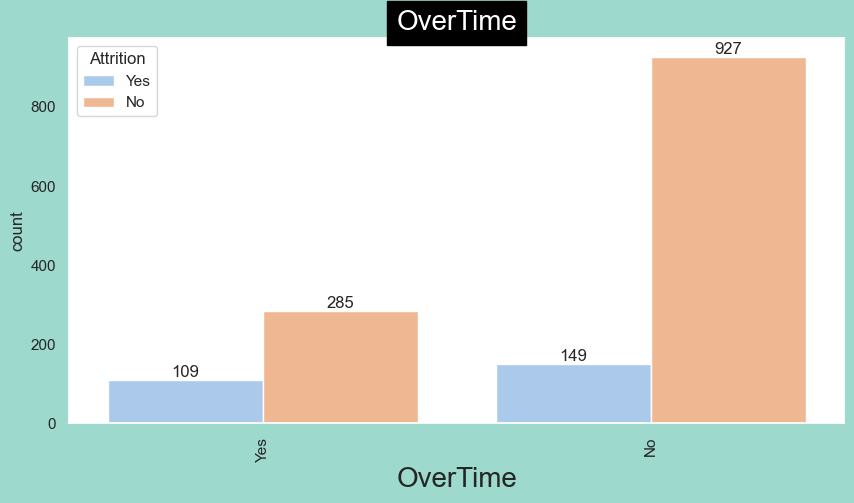

In [32]:
for column in cat : 
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

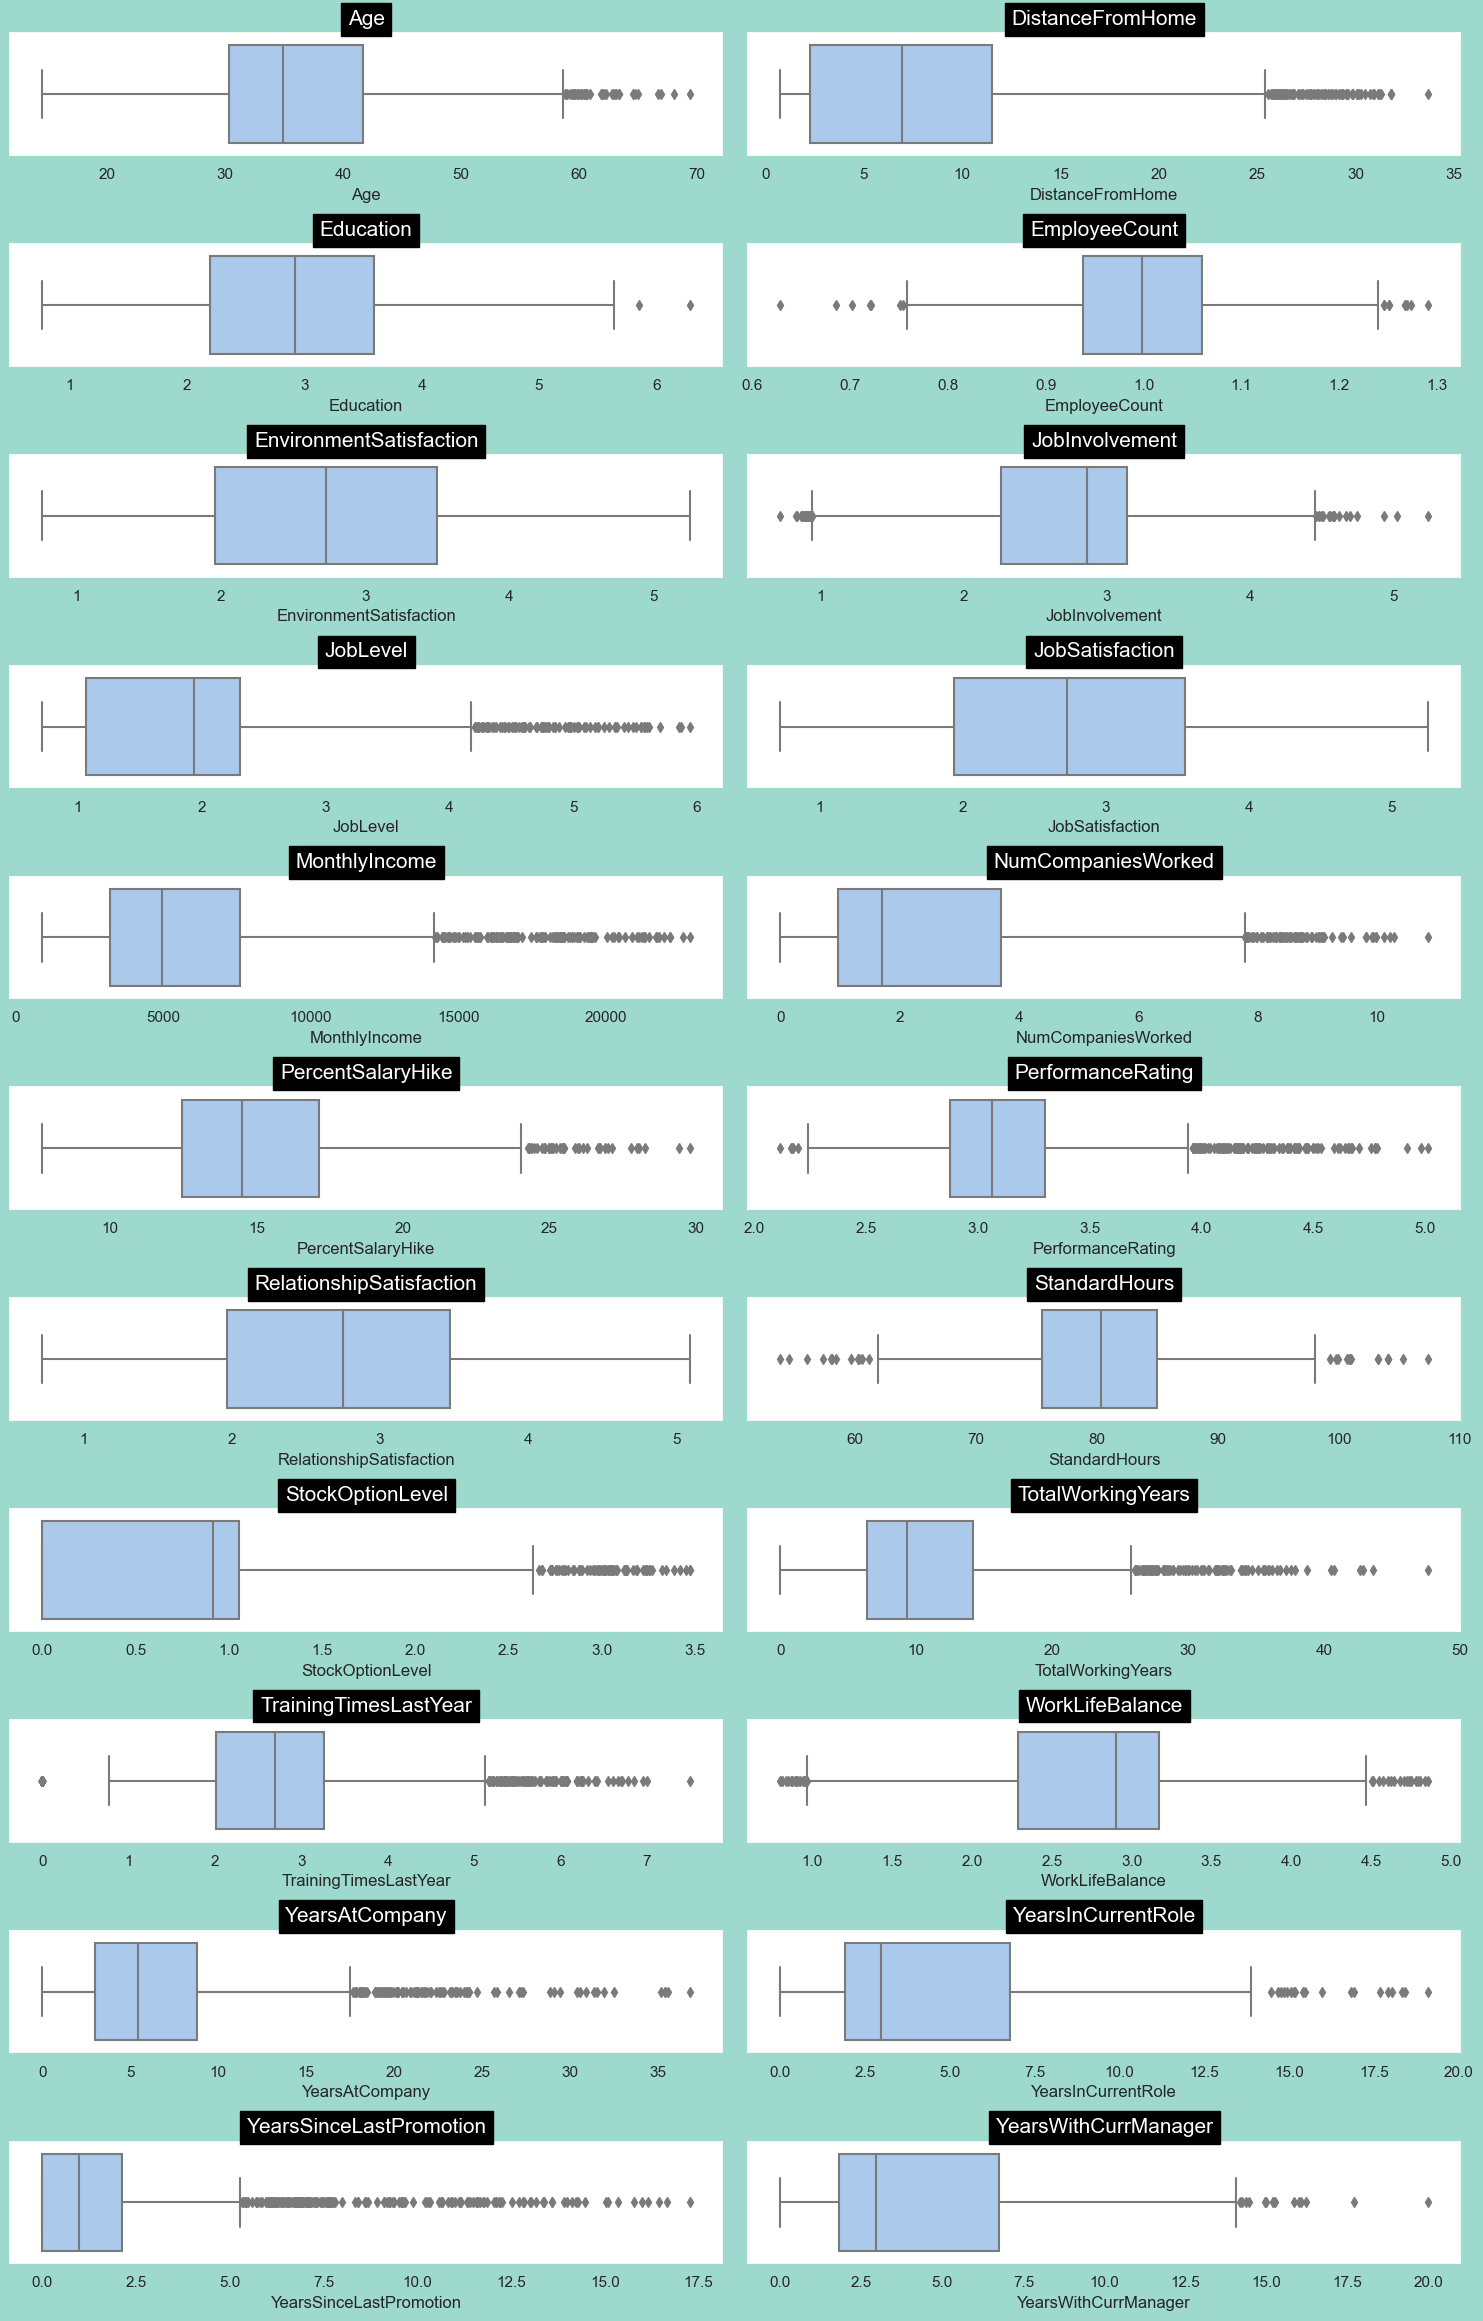

In [33]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

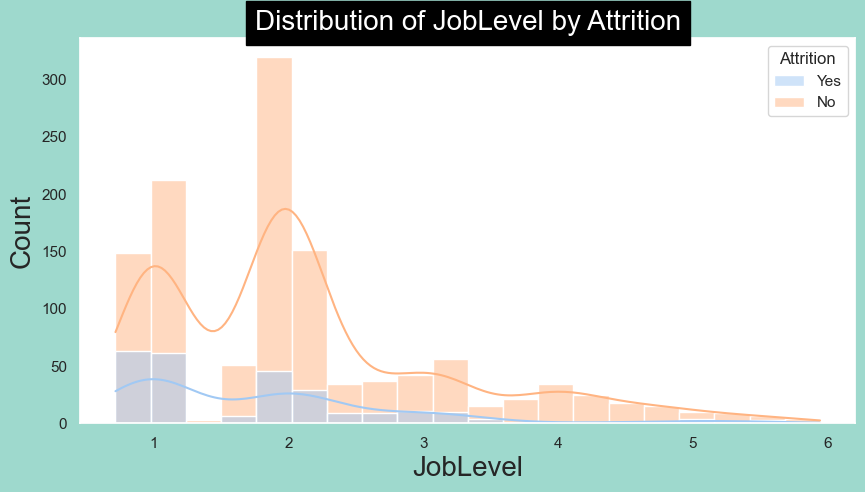

In [34]:
#Plot Job Level on a histogram against Attrition
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='JobLevel', hue='Attrition', bins=20, kde=True)
plt.title('Distribution of JobLevel by Attrition', backgroundcolor='black', color='white', fontsize=20)
plt.xlabel('JobLevel', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.show()


<Figure size 500x1000 with 0 Axes>

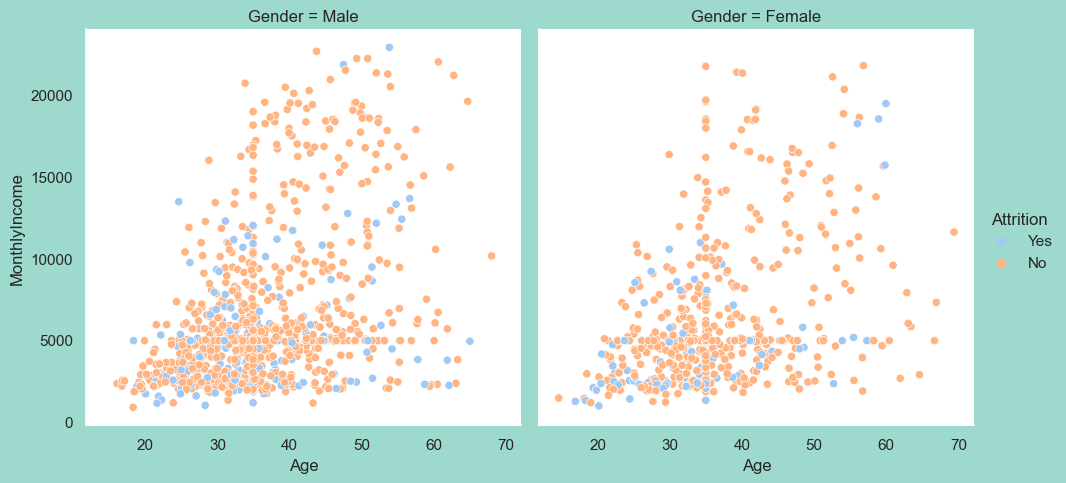

In [35]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

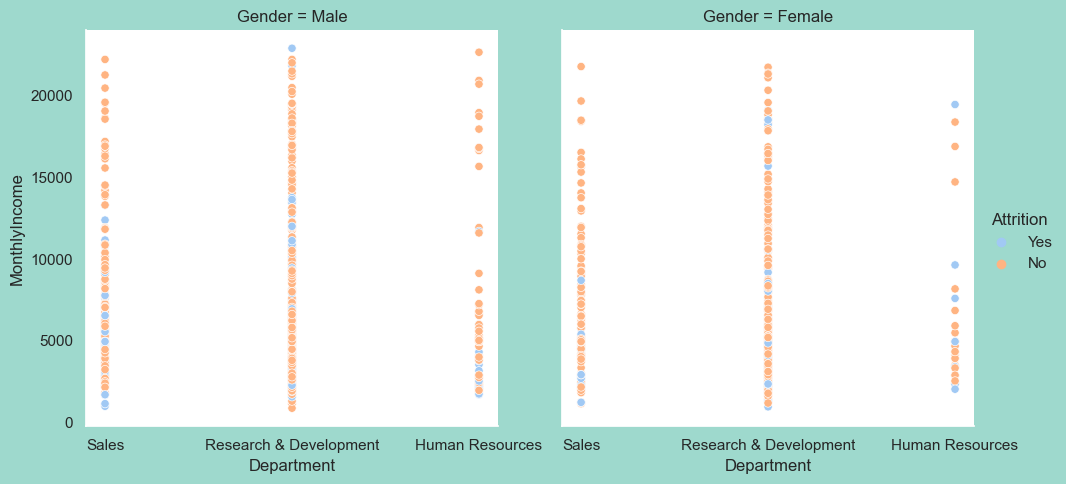

In [36]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

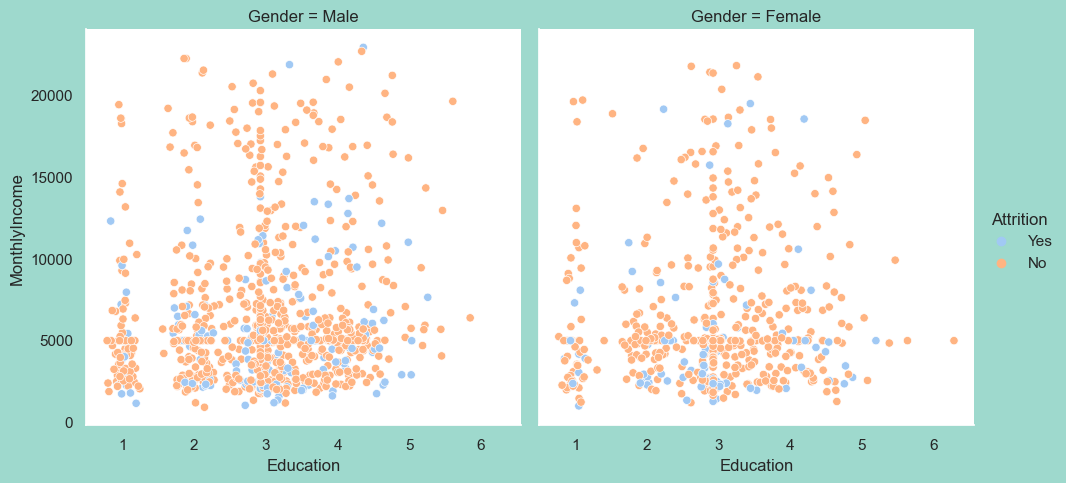

In [37]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

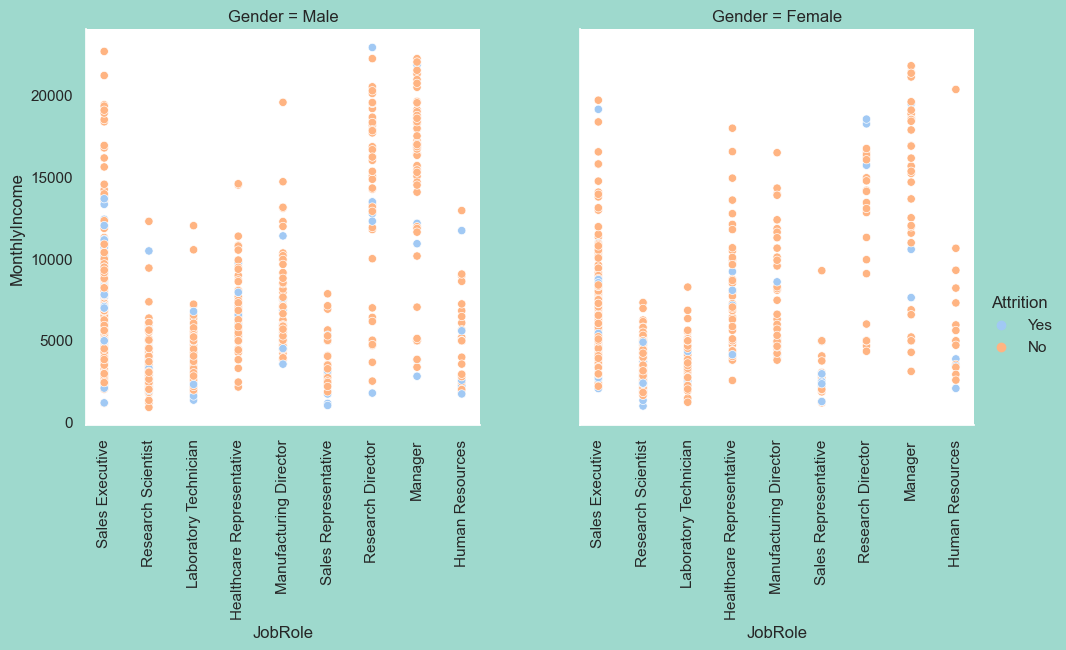

In [38]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

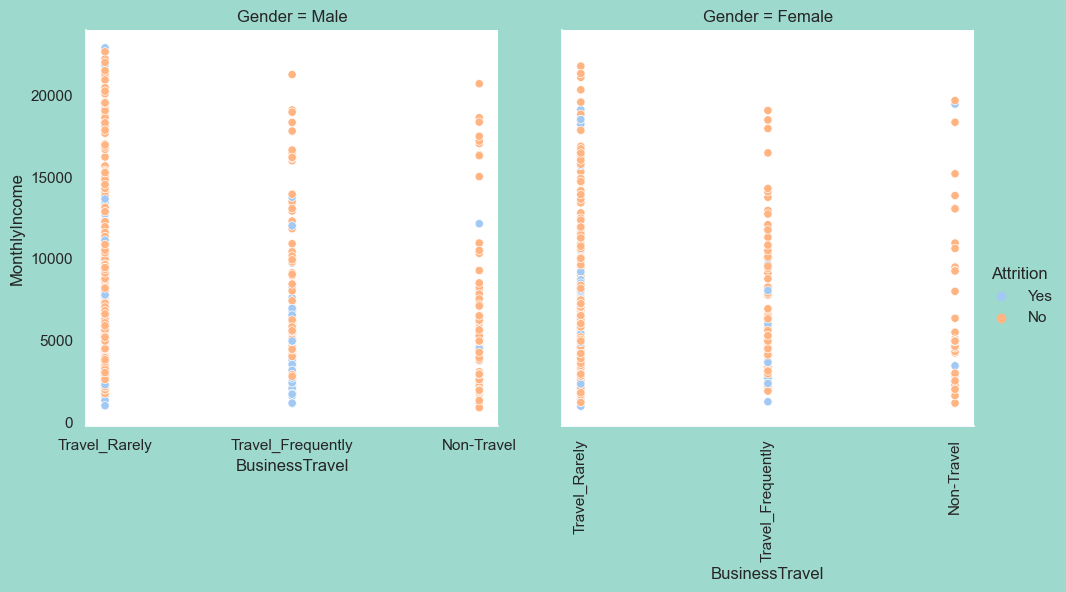

In [39]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

#Analyse the results here

# Department vs Attrition

In [40]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df_dept = df.groupby('Department')['Attrition'].mean().reset_index()
df_dept

Department  Attrition
0         Human Resources   0.198113
1  Research & Development   0.164779
2                   Sales   0.195929

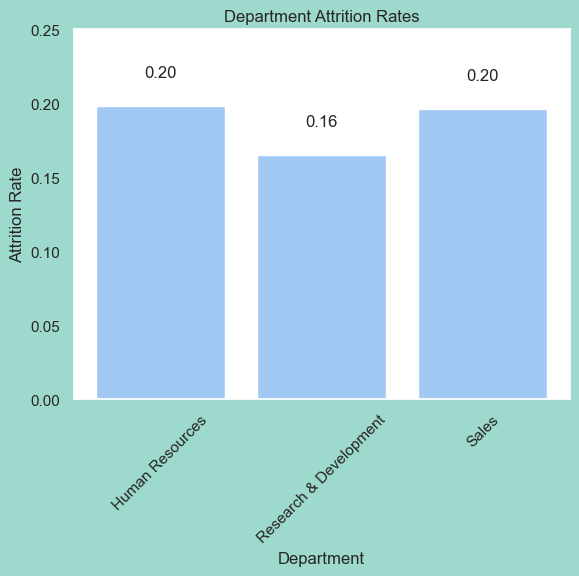

In [41]:
plt.bar(df_dept['Department'], df_dept['Attrition'])
plt.title('Department Attrition Rates')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.25))
plt.xticks(rotation=45)
for i, rate in enumerate(df_dept['Attrition']):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

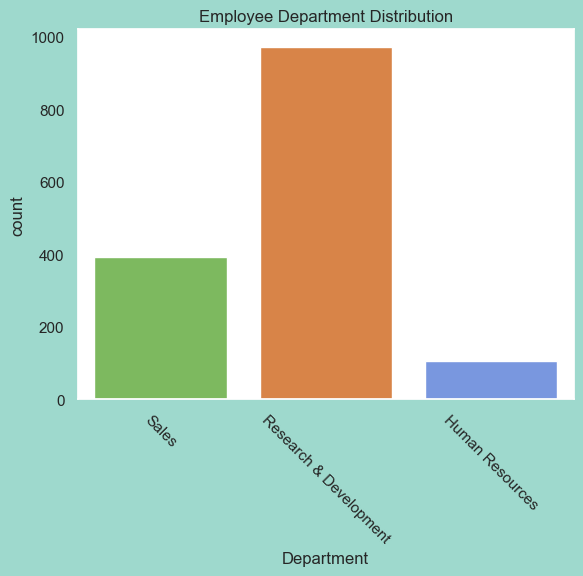

In [42]:
# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Employee Attrition per Department

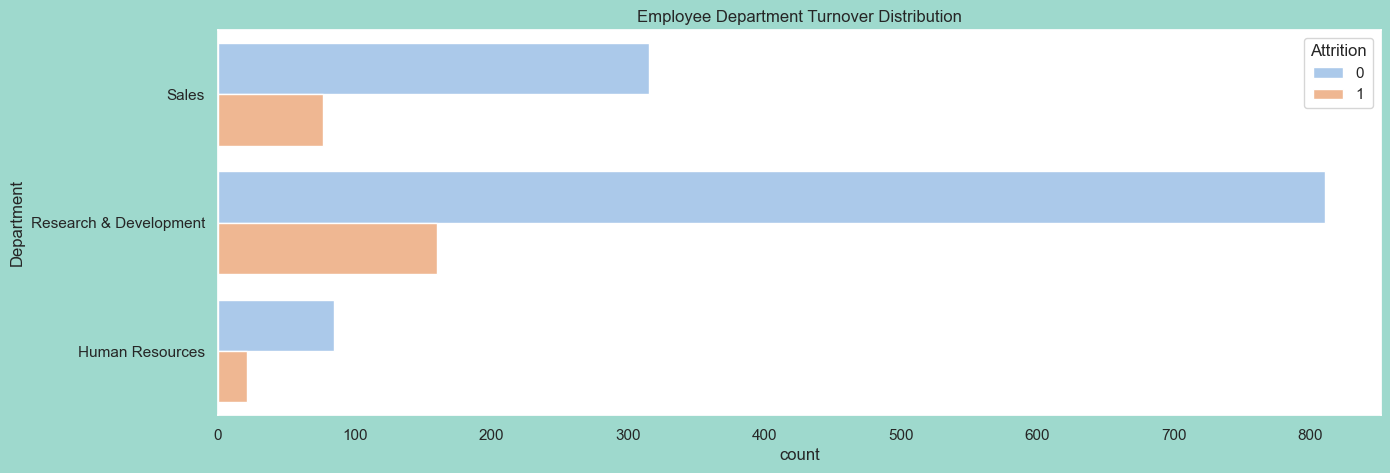

In [43]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Attrition', data=df).set_title('Employee Department Turnover Distribution');

# Environmnet Satisfaction vs Performance Rating

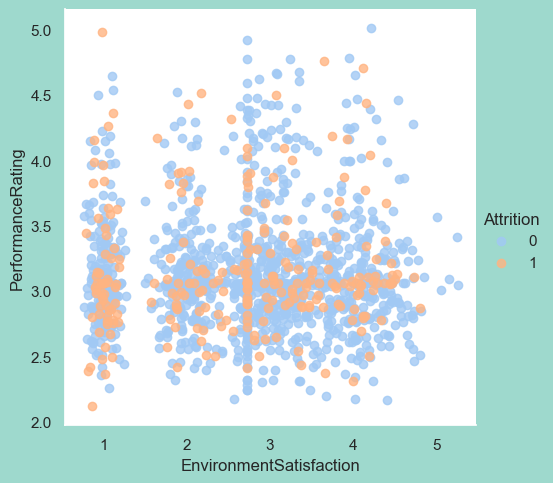

In [44]:
sns.lmplot(x='EnvironmentSatisfaction', y='PerformanceRating', data=df,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

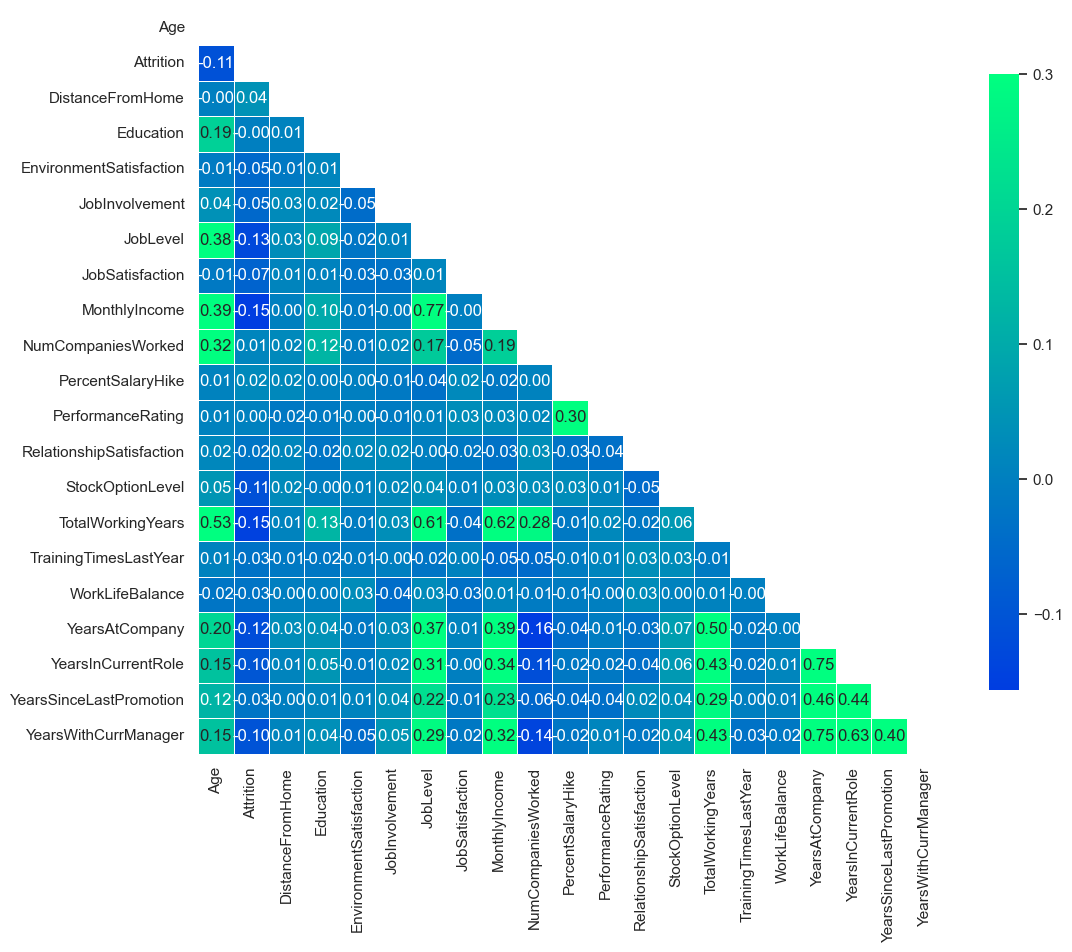

In [45]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features
df2 = df.copy()
df2 = df2.drop(['EmployeeCount','StandardHours'],axis=1)

corr = df2.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

# Probability assessment- factors influencing attrition

#Descriptive Statistics #Talk about boxplots and central tendencies of the data- from EDA section and Class 2 of Stats

# Relative Frequency

In [46]:
# Calculate the value counts of 'Attrition' in 'df2'
attrition_counts = df2['Attrition'].value_counts()

# Calculate the relative frequencies
relative_frequencies = attrition_counts / len(df2)

# Create a subtable
subtable = pd.DataFrame({
    'Attrition Status': attrition_counts.index,
    'Frequency': attrition_counts.values,
    'Relative Frequency': relative_frequencies.values
})

# Display the subtable
print(subtable)


   Attrition Status  Frequency  Relative Frequency
0                 0       1212             0.82449
1                 1        258             0.17551


# Correlation Matrix

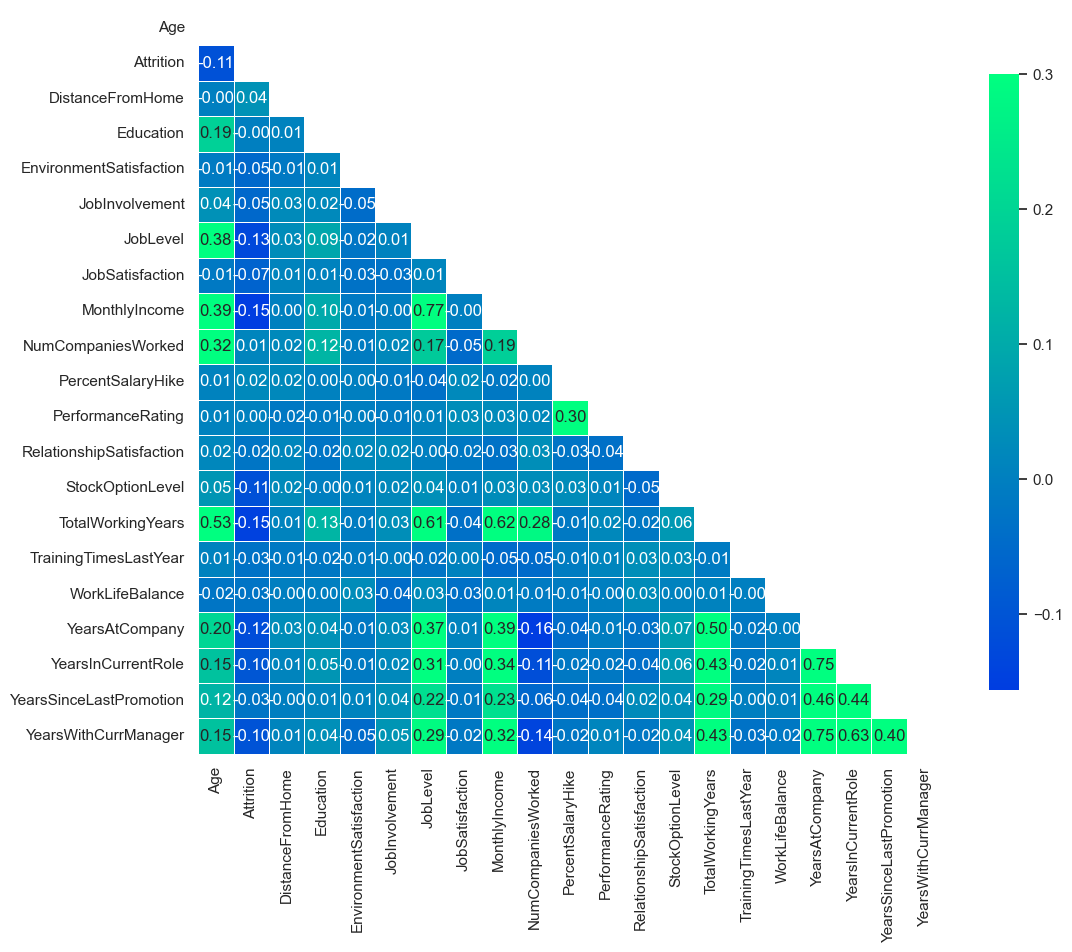

In [47]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features

corr = df2.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

# Scatterplot

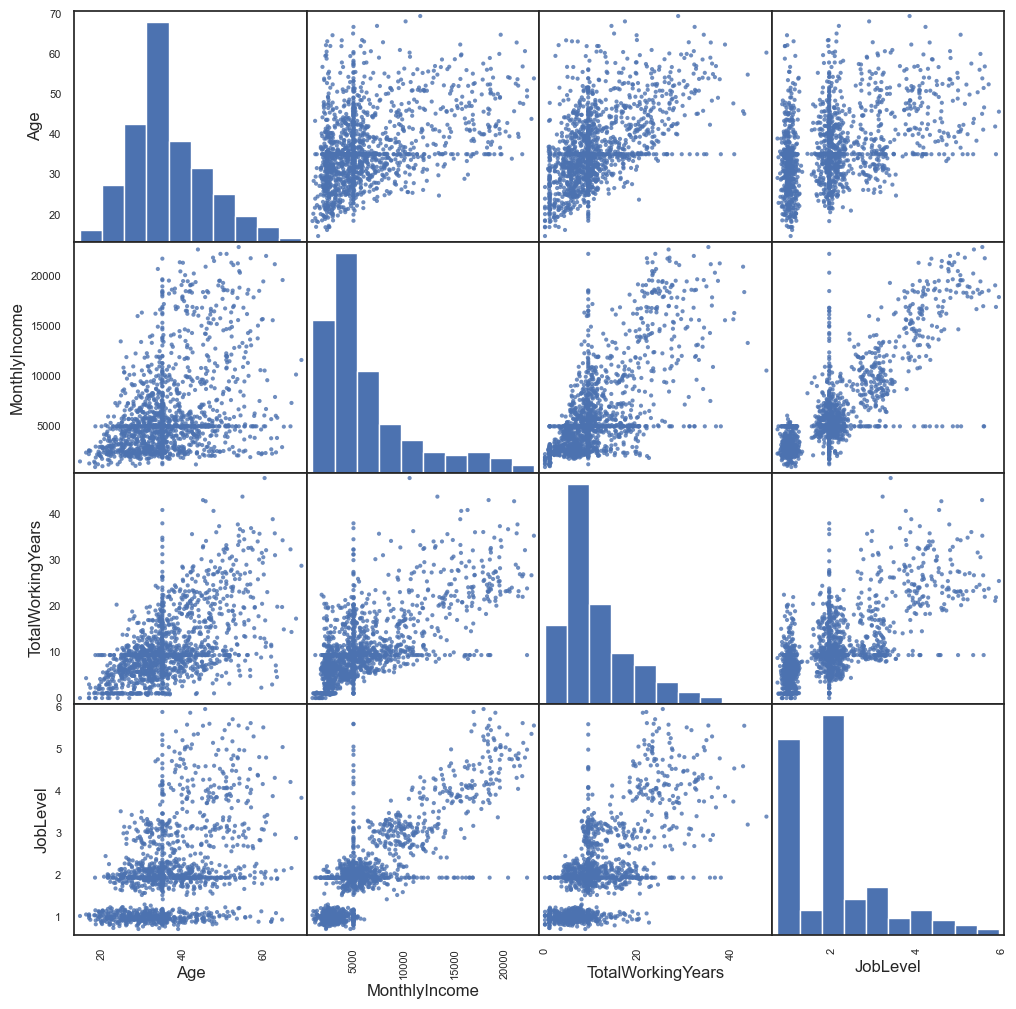

In [48]:

selected_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'JobLevel']
selected_data = df2[selected_columns]

# Create a scatterplot matrix
scatter_matrix(selected_data, alpha=0.8, figsize=(12, 12), diagonal='hist')

# Show the plot
plt.show()


In [49]:
#Analyse the results above

In [50]:
#Hypothesis:
#There are strong correlations between TotalWorkingYears and MonthlyIncome, and Age/TotalWorkingYears, and Age/MonthlyIncome
#Do older workers leave at a higher rate than younger ones?

# Boxplot and T-Tests on Attrition by Age

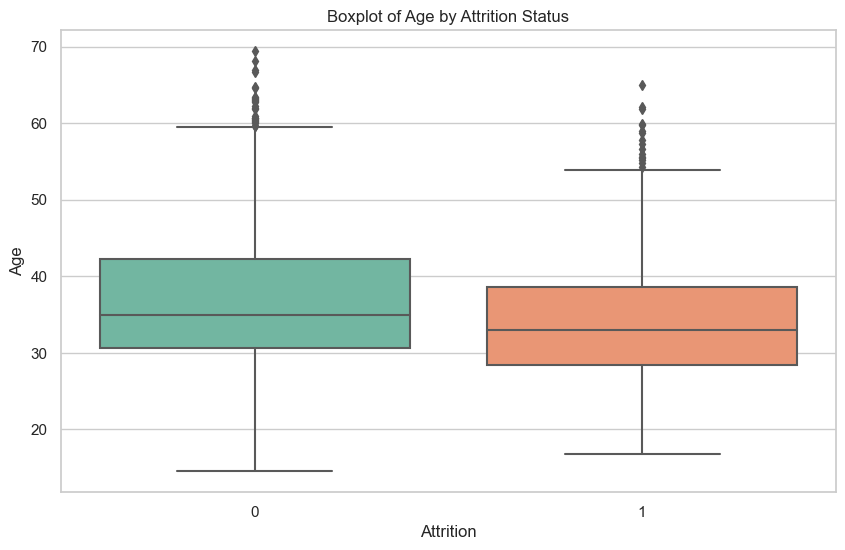

In [51]:
# Create a boxplot 
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df2, palette='Set2')
plt.title('Boxplot of Age by Attrition Status')
plt.show()


In [52]:
# Descriptive statistics
print(df2.groupby('Attrition')['Age'].describe())

            count       mean       std        min        25%        50%  \
Attrition                                                                 
0          1212.0  36.853325  9.262683  14.544608  30.700259  34.951950   
1           258.0  34.651812  9.772926  16.840129  28.375773  33.057296   

                 75%        max  
Attrition                        
0          42.251654  69.402515  
1          38.647652  65.043722  


In [53]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == '0']
stayed_data = df2[df2['Attrition'] == '1']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['Age'], stayed_data['Age'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in Age.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Age.")


Fail to reject the null hypothesis: No significant difference in Age.


# Attrition by Monthly Income

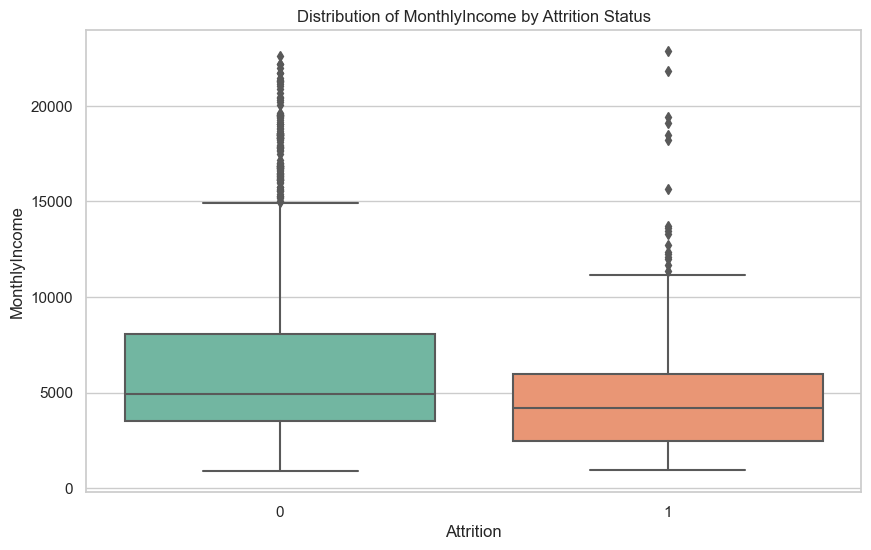

In [54]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df2, palette='Set2')
plt.title('Distribution of MonthlyIncome by Attrition Status')
plt.show()


# T-Tests

In [55]:
# Descriptive statistics
print(df2.groupby('Attrition')['MonthlyIncome'].describe())

            count         mean          std         min          25%  \
Attrition                                                              
0          1212.0  6656.372316  4658.401672  891.481007  3498.427642   
1           258.0  5115.614562  3734.981461  974.659192  2467.614020   

                   50%          75%           max  
Attrition                                          
0          4957.070475  8077.134563  22615.197479  
1          4211.200613  5971.124096  22858.020388  


In [56]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == '1']
stayed_data = df2[df2['Attrition'] == '0']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['MonthlyIncome'], stayed_data['MonthlyIncome'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in monthly income.")
else:
    print("Fail to reject the null hypothesis: No significant difference in monthly income.")


Fail to reject the null hypothesis: No significant difference in monthly income.


# Overall probability of success

In [57]:
#Overall probability of success

# Assuming 'Attrition' column contains 1 for attrition and 0 for no attrition
overall_prob_attrition = df2['Attrition'].value_counts(normalize=True).get(1, 0)
print(f"Overall probability of Attrition: {overall_prob_attrition:.2%}")



Overall probability of Attrition: 17.55%


# Z-scores

In [58]:
# Calculate Z-scores for the 'Age' column
df2['Age_Zscore'] = (df2['Age'] - df2['Age'].mean()) / df2['Age'].std()

# Display the first few rows of the dataset with Z-scores
print(df2[['Age', 'Age_Zscore']].head())


         Age  Age_Zscore
0  41.920786    0.580921
1  51.589037    1.610741
2  33.131540   -0.355272
3  34.707073   -0.187453
4  24.790188   -1.243757


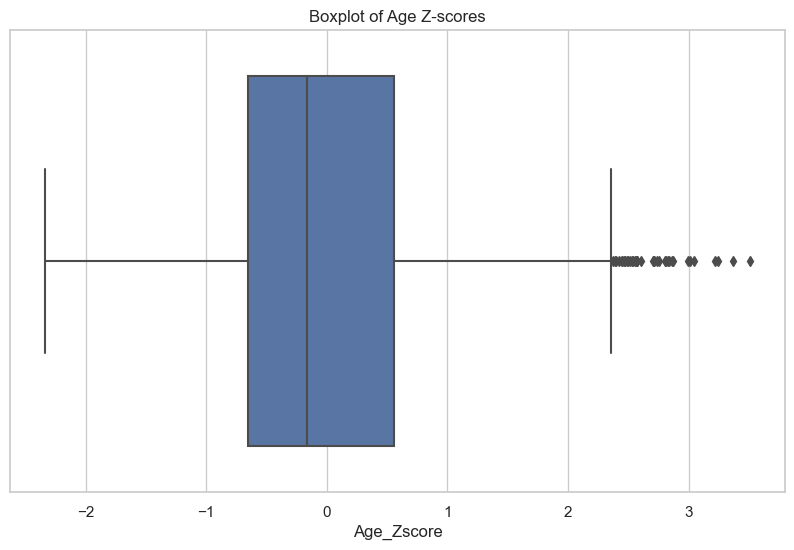

In [59]:
# Visualize Z-scores using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Zscore', data=df2)
plt.title('Boxplot of Age Z-scores')
plt.show()


# Confidence Intervals

In [60]:
#We want to know the average age where attrition is yes.

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as st

column_name = 'Age'
X = df2[df2['Attrition'] == 1][[column_name]].values

mean = X.mean()

# Create the confidence interval at 90% confidence for the average age where attrition is yes.
confidence_interval = st.t.interval(alpha=0.90, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))

print(f"Mean Age where Attrition is 'Yes': {mean:.2f}")
print(f"Confidence Interval (90%): {confidence_interval}")



Mean Age where Attrition is 'Yes': 34.65
Confidence Interval (90%): (array([33.64740336]), array([35.65622022]))


In [62]:
age_statistics = df2['Age'].describe()

print(age_statistics)


count    1470.000000
mean       36.466937
std         9.388288
min        14.544608
25%        30.357410
50%        34.951950
75%        41.714666
max        69.402515
Name: Age, dtype: float64


In [63]:
#Lower limit

LL = 36.466937 - (1.65 * 9.388288/(123**0.5))
LL

35.07018985516642

In [64]:
#Upper limit

UL = 36.466937 + (1.65 * 9.388288/(123**0.5))
UL

37.863684144833584

In [65]:
#Now we will perform the CI assuming Normal distribution

from scipy import stats

In [66]:
stats.norm.interval(0.90,loc = np.mean(X),scale = st.sem(X))

(array([33.65102393]), array([35.65259965]))

In [67]:
#Now, we want to analyse the average age where attrition is yes at 95% confidence

In [68]:
confidence_interval_95 = st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))
confidence_interval_95

(array([33.45365716]), array([35.84996642]))

In [69]:
confidence_interval_99 = st.t.interval(alpha=0.99, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))
confidence_interval_99

(array([33.07286346]), array([36.23076012]))

# ANOVA-One Way

<Figure size 640x480 with 0 Axes>

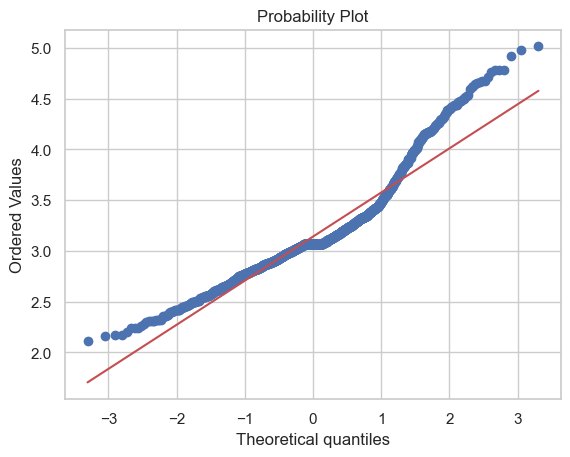

<Figure size 640x480 with 0 Axes>

In [70]:
#We check normality with QQ-plot
from scipy import stats

stats.probplot(df2.PerformanceRating, plot = plt)
plt.figure()

In [71]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Human Resources"])

ShapiroResult(statistic=0.948143720626831, pvalue=0.0004115627962164581)

In [72]:
#H0: data comes from normal distribution
#H1: data does not come from normal distribution
#We use alpha (significance level 5%)
#As p-value is less than 0.05(alpha), then we accept H1, then data does not come from normal distribution

In [73]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Research & Development"])

ShapiroResult(statistic=0.9097204804420471, pvalue=1.521717577108944e-23)

In [74]:
#As p-value is greater than alpha, then we accept H0, then data comes from normal distribution

In [75]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Sales"])

ShapiroResult(statistic=0.9269786477088928, pvalue=6.375994567389687e-13)

In [76]:
#As p-value is greater than alpha, then we accept H0, then data comes from normal distribution

In [77]:
#Check equality of the variances
HumanResources = df2.PerformanceRating[df2.Department =="Human Resources"]
ResearchDevelopment = df2.PerformanceRating[df2.Department =="Research & Development"]
Sales = df2.PerformanceRating[df2.Department =="Sales"]

In [78]:
#We perform Levene test to check equality of the variances

#H0: the variances are equal between the Departments
#H1: the variances are not equal between the Departments

from scipy.stats import levene

levene(HumanResources, ResearchDevelopment, Sales, center = 'mean')

LeveneResult(statistic=1.326312241907514, pvalue=0.26577250811604886)

In [79]:
#As p-value is greater than alpha, the we accept H0, and then we can assume equality of the variances

In [80]:
#Now we checked all the conditions, and we can move on with ANOVA

#H0 : mu PerformanceRating HumanResources = mu PerformanceRating ResearchDevelopment = mu PerformanceRating Sales
#H1: there is at least one of these mu that is different to the others

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('PerformanceRating~Department', data = df2).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

                df     sum_sq   mean_sq         F    PR(>F)
Department     2.0    0.69927  0.349635  1.710746  0.181091
Residual    1467.0  299.81923  0.204376       NaN       NaN


In [81]:
#Result = we checked the p-value and this is 0.18, which is greater than 0.05 (alpha). As p-value is greater then we accept H0
#In summary, the ANOVA results suggest that there is no significant difference in the means of the 'Department' variable

# Dealing with outliers

In [82]:
cat_features = df2.select_dtypes('object').copy()
num_features = df2.select_dtypes(['float64', 'int64']).copy()
cat_features.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences    Male   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently                   Sales  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

In [83]:
num_features.head()

Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  41.920786          1.016716   1.770313                 2.146294   
1  51.589037          6.920808   1.035333                 3.470803   
2  33.131540          2.198662   2.118801                 3.979420   
3  34.707073          2.937851   3.670674                 3.734705   
4  24.790188          1.988953   1.120496                 1.079412   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0        3.426960  2.464492         3.397665    6438.949336   
1        1.813458  1.788697         1.584059    4457.659622   
2        1.877226  0.833488         3.301009    2124.545220   
3        2.932646  1.095372         3.220844    2771.699080   
4        3.117739  0.937746         1.697330    3254.601575   

   NumCompaniesWorked  PercentSalaryHike  ...  RelationshipSatisfaction  \
0            7.077818           9.898765  ...                  1.012832   
1            1.114423          14.495151  ...                  4.312008   
2            5.539591          15.401596  ...                  2.332558   
3            0.772793           9.757546  ...                  3.029591   
4           10.118125          11.920147  ...                  2.720431   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0          0.000000           8.063833               0.000000   
1          1.104642           8.965059               3.264952   
2          0.000000           8.427238               3.004521   
3          0.000000           7.662606               2.856001   
4          0.953012           6.241733               2.814719   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0         1.052104        5.795945            3.993896   
1         2.526470       10.070232            7.937505   
2         2.924784        0.000000            0.000000   
3         3.117053        8.435324            5.563667   
4         3.112317        2.040124            1.970786   

   YearsSinceLastPromotion  YearsWithCurrManager  Age_Zscore  
0                 0.000000              4.594972    0.580921  
1                 1.032295              5.901207    1.610741  
2                 0.000000              0.000000   -0.355272  
3                 2.845429              0.000000   -0.187453  
4                 2.495949              2.219353   -1.243757  

[5 rows x 21 columns]

In [84]:
def plot_numeric_variable_boxplots(df2):
    numerical_vars = df2.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=df2, x=var, ax=axs[i])
        axs[i].set_title(f"Boxplot of {var}")
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

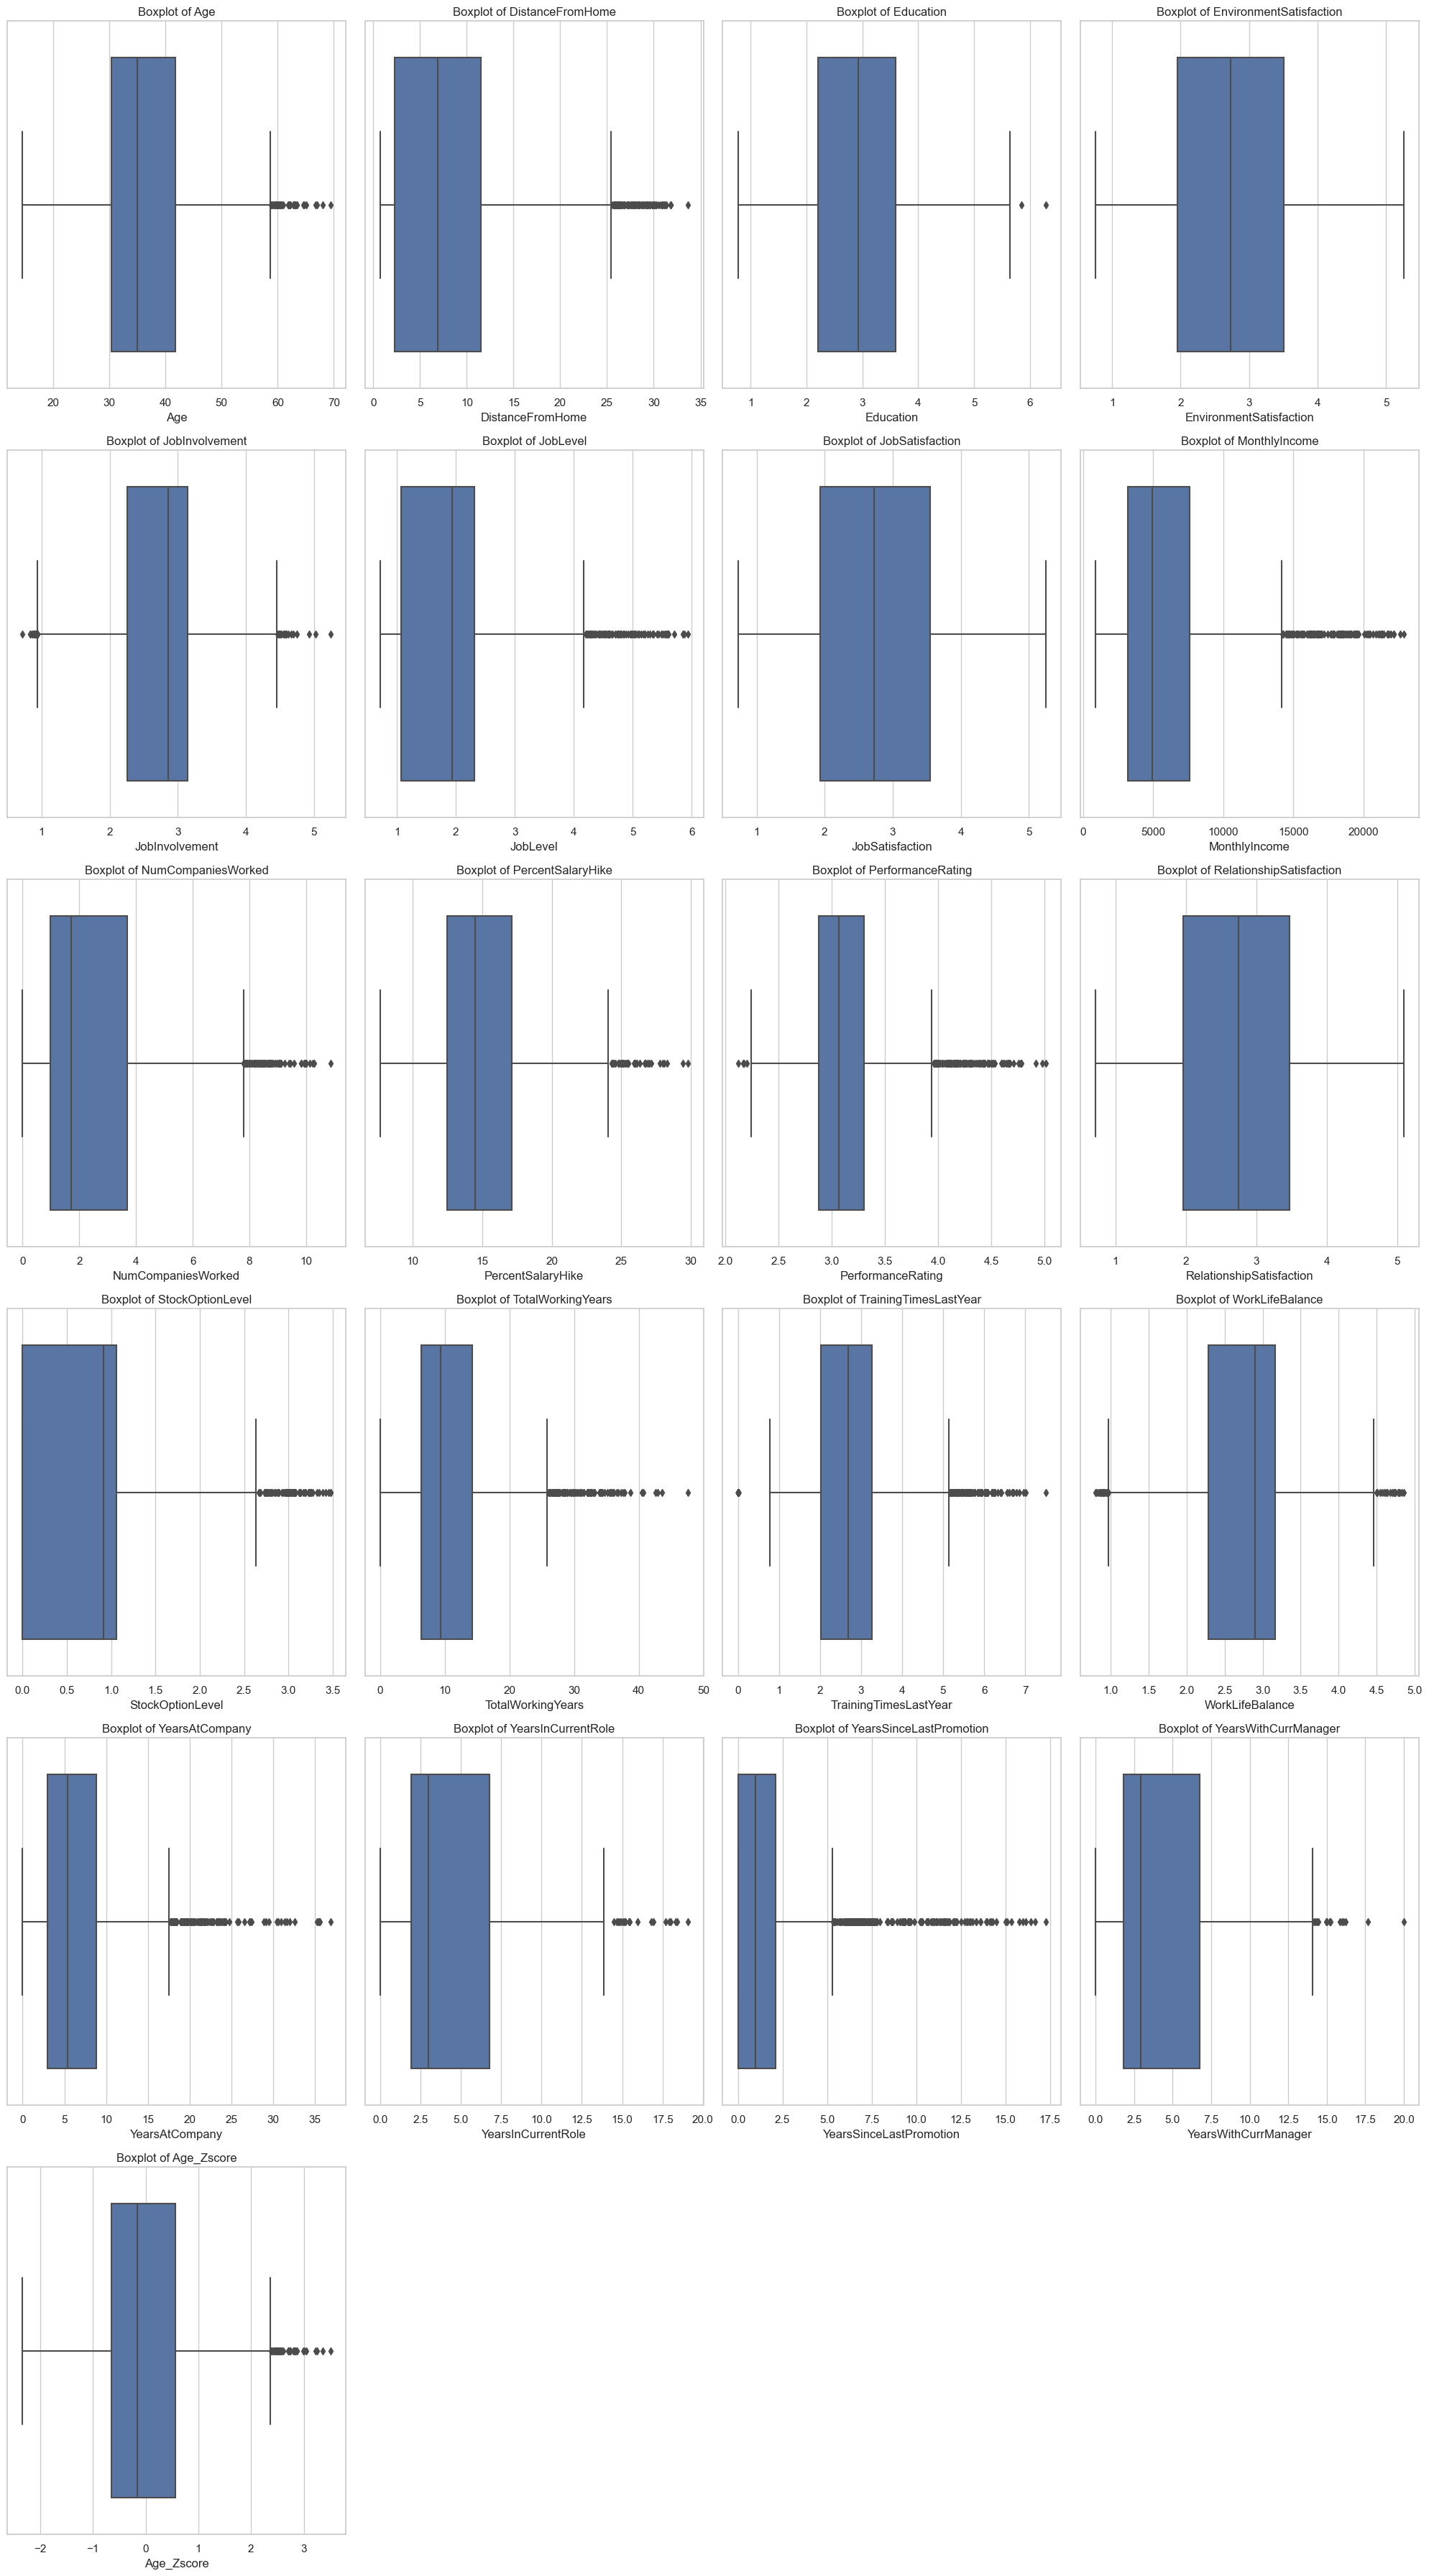

In [85]:
plot_numeric_variable_boxplots(num_features)

In [86]:
def replace_outliers_with_upper(dataframe, method='iqr', multiplier=1.5):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for var in numerical_vars:
        if method == 'iqr':
            Q1 = dataframe[var].quantile(0.25)
            Q3 = dataframe[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            dataframe[var] = np.where(dataframe[var] >= upper_bound, upper_bound, dataframe[var])
        elif method == 'std':
            mean = dataframe[var].mean()
            std = dataframe[var].std()
            lower_bound = mean - multiplier * std
            upper_bound = mean + multiplier * std
            dataframe[var] = np.where(dataframe[var] >= upper_bound, dataframe[dataframe[var] <= upper_bound][var].max(), dataframe[var])
        else:
            raise ValueError("Invalid method. Choose either 'iqr' or 'std'.")
    return dataframe

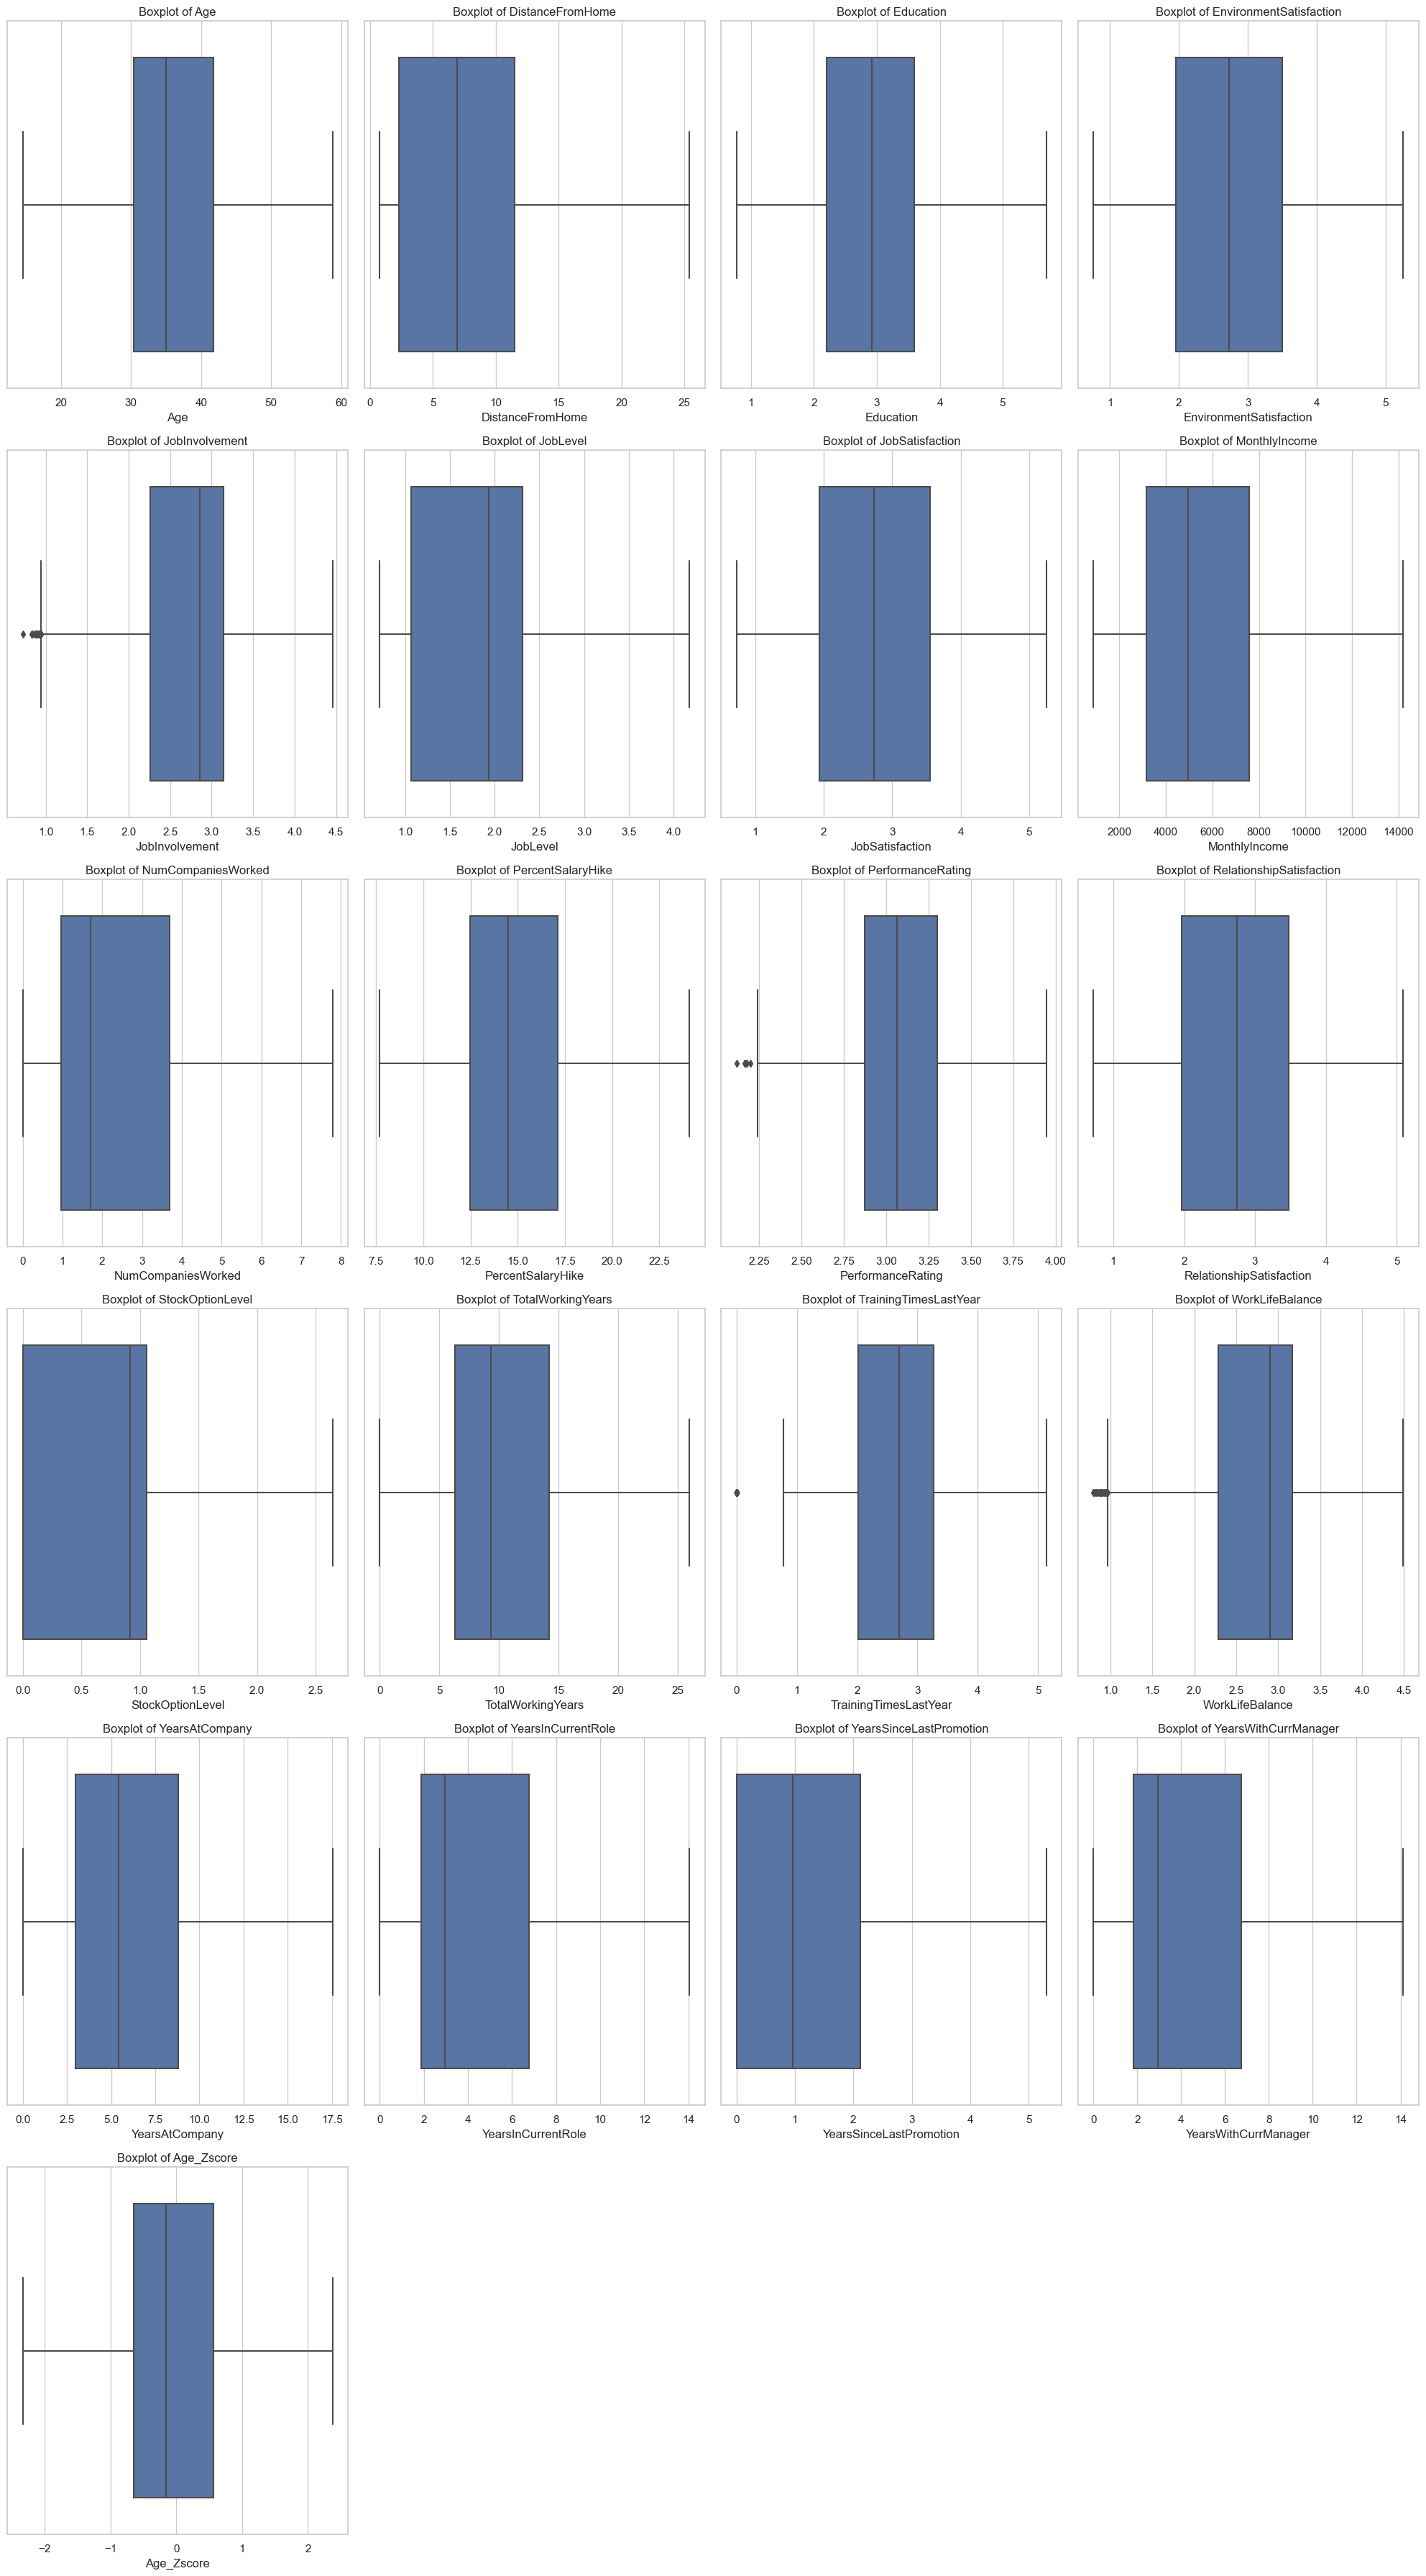

In [87]:
num_features = replace_outliers_with_upper(num_features)
plot_numeric_variable_boxplots(num_features)

In [88]:
num_columns = list(num_features.columns)
cat_columns = list(cat_features.columns)

In [89]:
df2[num_columns] = num_features
df2[cat_columns] = cat_features
df2.head()

Age  Attrition     BusinessTravel              Department  \
0  41.920786          1      Travel_Rarely                   Sales   
1  51.589037          0  Travel_Frequently  Research & Development   
2  33.131540          1      Travel_Rarely  Research & Development   
3  34.707073          0  Travel_Frequently                   Sales   
4  24.790188          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0          1.016716   1.770313  Life Sciences                 2.146294   
1          6.920808   1.035333  Life Sciences                 3.470803   
2          2.198662   2.118801          Other                 3.979420   
3          2.937851   3.670674  Life Sciences                 3.734705   
4          1.988953   1.120496        Medical                 1.079412   

   Gender  JobInvolvement  ...  RelationshipSatisfaction StockOptionLevel  \
0    Male        3.426960  ...                  1.012832         0.000000   
1    Male        1.813458  ...                  4.312008         1.104642   
2    Male        1.877226  ...                  2.332558         0.000000   
3  Female        2.932646  ...                  3.029591         0.000000   
4    Male        3.117739  ...                  2.720431         0.953012   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           8.063833              0.000000         1.052104        5.795945   
1           8.965059              3.264952         2.526470       10.070232   
2           8.427238              3.004521         2.924784        0.000000   
3           7.662606              2.856001         3.117053        8.435324   
4           6.241733              2.814719         3.112317        2.040124   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0           3.993896                 0.000000              4.594972   
1           7.937505                 1.032295              5.901207   
2           0.000000                 0.000000              0.000000   
3           5.563667                 2.845429              0.000000   
4           1.970786                 2.495949              2.219353   

   Age_Zscore  
0    0.580921  
1    1.610741  
2   -0.355272  
3   -0.187453  
4   -1.243757  

[5 rows x 29 columns]

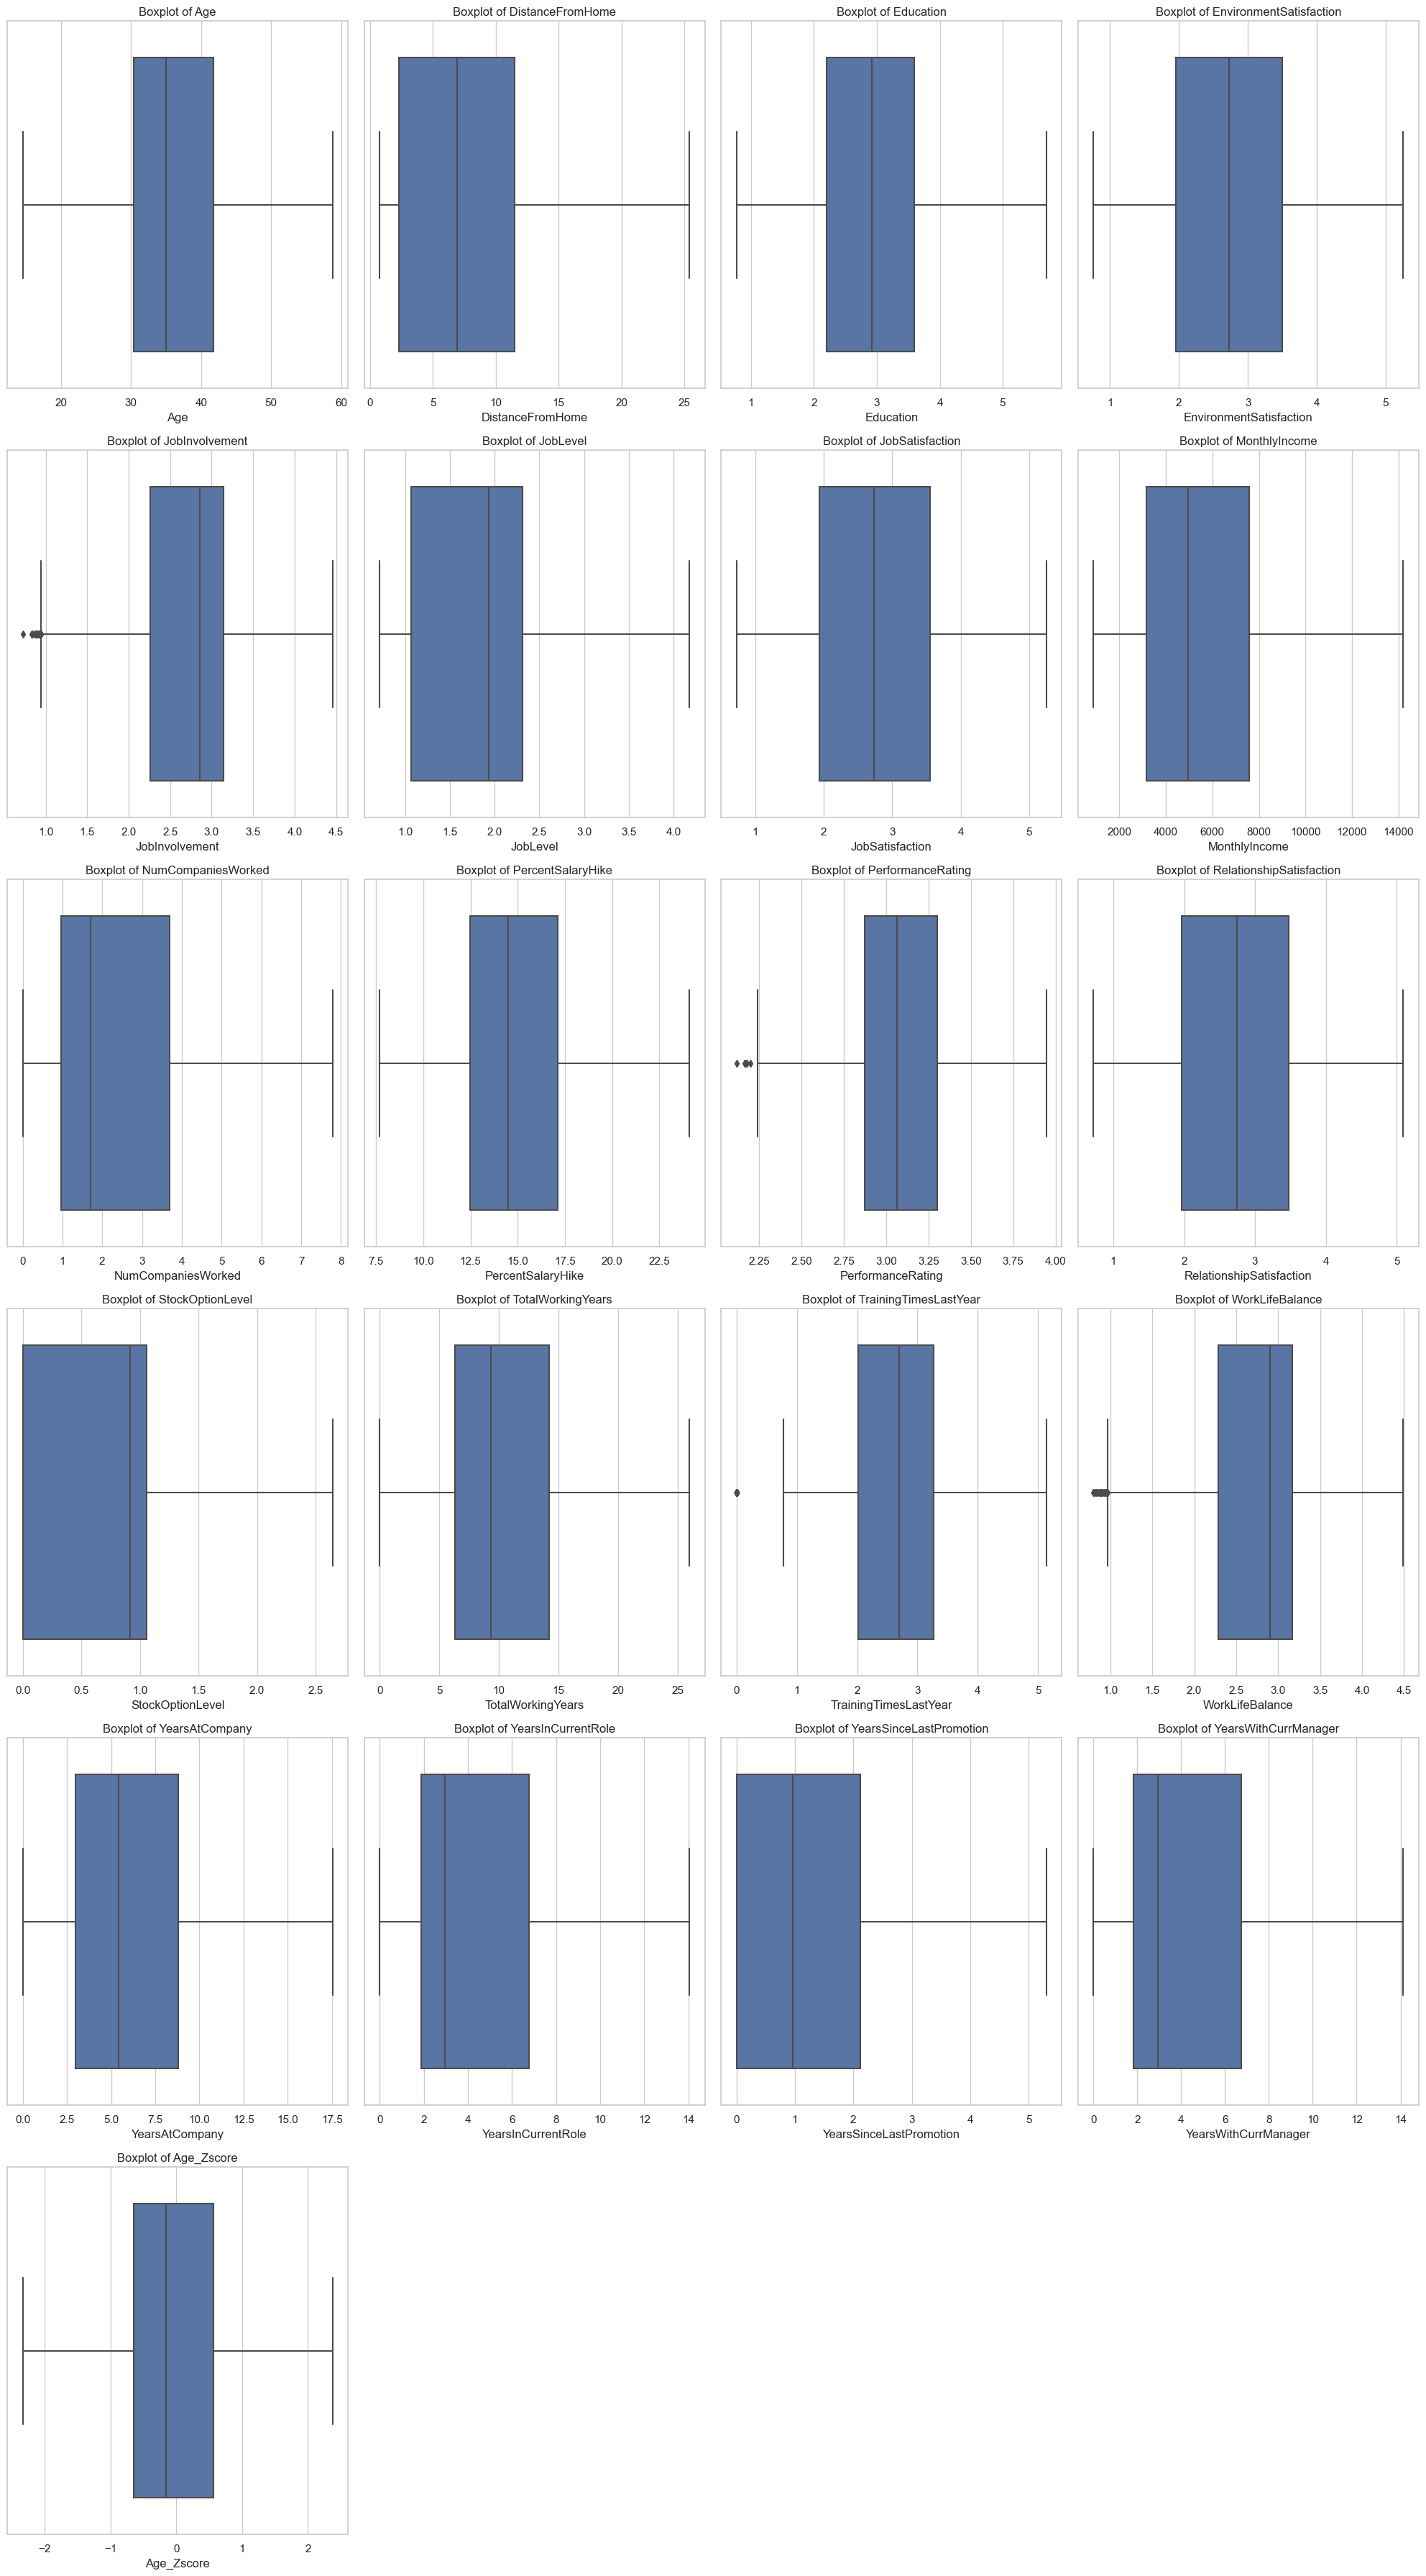

In [90]:
plot_numeric_variable_boxplots(df2)

# Encoding

In [91]:
df_encoded=df2.copy()

In [92]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_encoded['Attrition']=label_encoder.fit_transform(df2['Attrition'])
df_encoded['OverTime']=label_encoder.fit_transform(df2['OverTime'])
df_encoded['Gender']=label_encoder.fit_transform(df2['Gender'])

In [93]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_encoded=pd.get_dummies(df_encoded, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

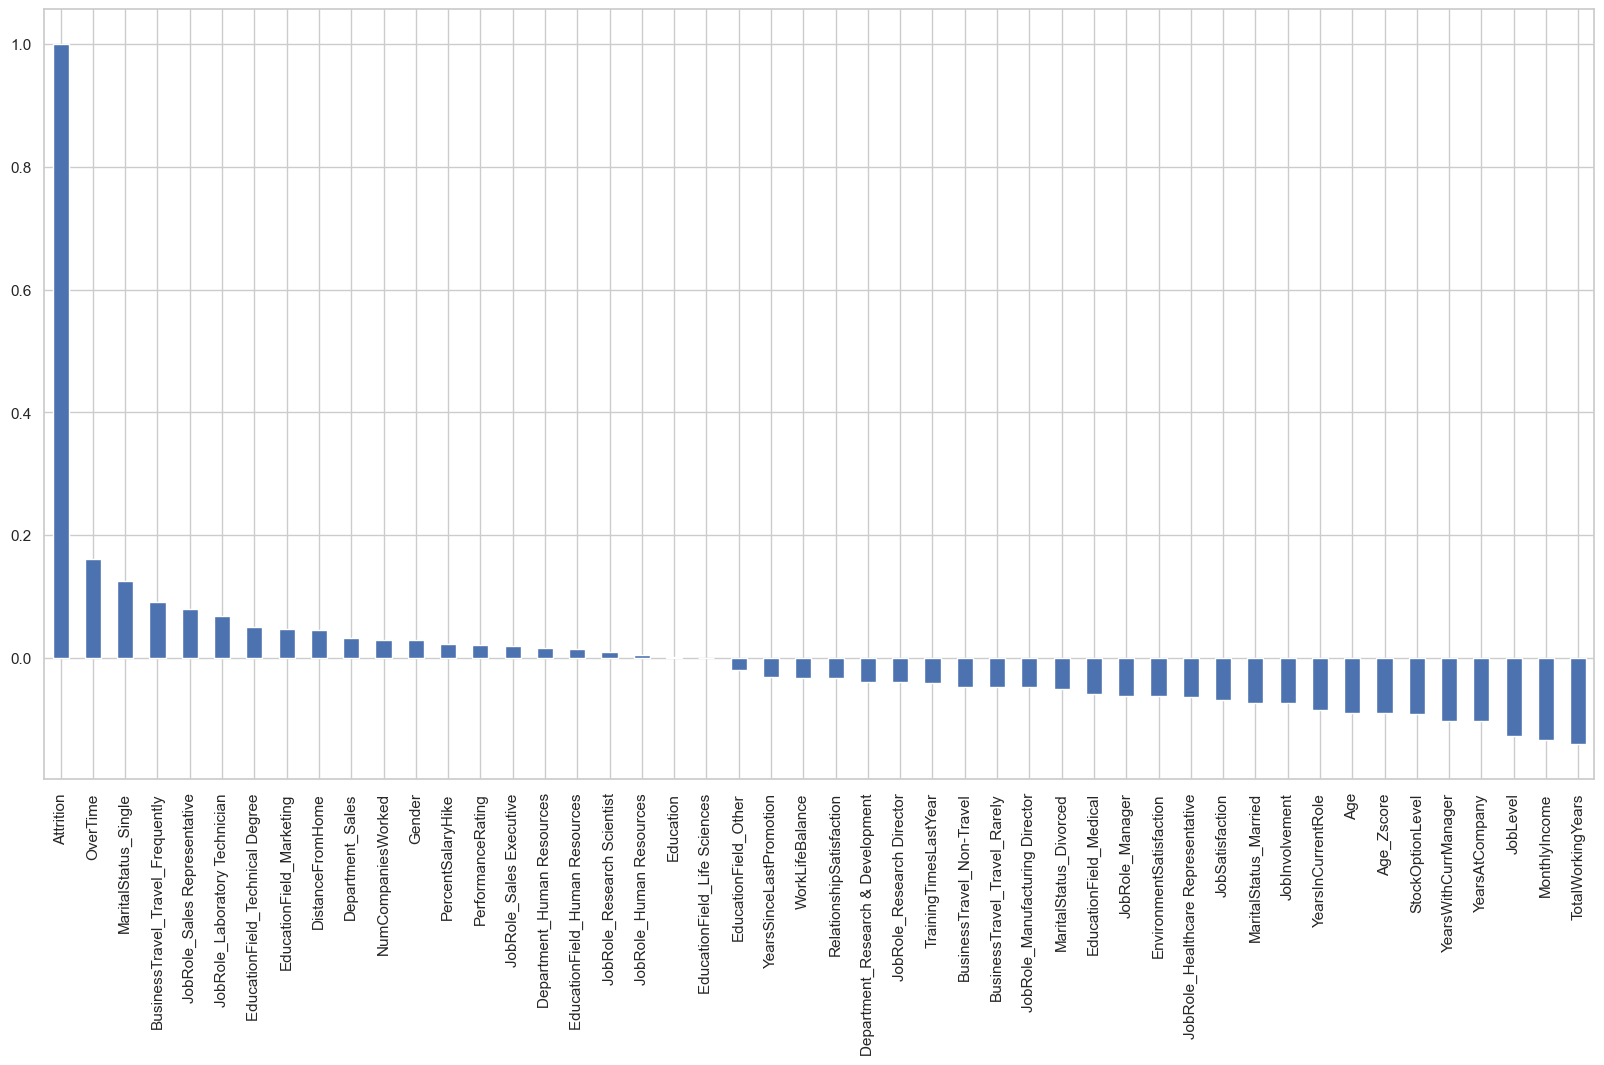

In [94]:
plt.figure(figsize=(20,10))
correlations=df_encoded.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# LDA

In [95]:
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preproc

In [96]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
lda = LDA(n_components=min(X_train.shape[1], len(np.unique(y_train)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [99]:
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
fit1 = classifier.fit(X_train_lda, y_train)

In [100]:
y_pred = fit1.predict(X_test_lda)

In [101]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[357   8]
 [ 65  11]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       365
           1       0.58      0.14      0.23        76

    accuracy                           0.83       441
   macro avg       0.71      0.56      0.57       441
weighted avg       0.80      0.83      0.79       441



# PCA

In [102]:
from cycler import cycler
import mglearn
from sklearn.decomposition import PCA

In [103]:
df_encoded.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  41.920786          1          1.016716   1.770313                 2.146294   
1  51.589037          0          6.920808   1.035333                 3.470803   
2  33.131540          1          2.198662   2.118801                 3.979420   
3  34.707073          0          2.937851   3.670674                 3.734705   
4  24.790188          0          1.988953   1.120496                 1.079412   

   Gender  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0       1        3.426960  2.464492         3.397665    6438.949336  ...   
1       1        1.813458  1.788697         1.584059    4457.659622  ...   
2       1        1.877226  0.833488         3.301009    2124.545220  ...   
3       0        2.932646  1.095372         3.220844    2771.699080  ...   
4       1        3.117739  0.937746         1.697330    3254.601575  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 48 columns]

In [104]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1470, 47), (1470,), (1102, 47), (368, 47), (1102,), (368,))

In [105]:
from sklearn.preprocessing import MinMaxScaler

# Create an object using Min-Max scaler
scaler = MinMaxScaler()

# Train the Min-Max Scaler model
scaler.fit(X_train)

# Transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)


[[0.2996 0.0157 0.4457 ... 0.     0.     1.    ]
 [0.3317 0.0973 0.6177 ... 0.     0.     1.    ]
 [0.5042 0.5203 0.7854 ... 0.     1.     0.    ]
 ...
 [0.4616 0.2267 0.2583 ... 0.     0.     1.    ]
 [0.4616 0.6827 0.4808 ... 0.     1.     0.    ]
 [0.1715 0.2502 0.2633 ... 0.     1.     0.    ]] 	 [[0.4793 0.3089 0.697  ... 0.     0.     1.    ]
 [0.0519 0.2502 0.4373 ... 0.     1.     0.    ]
 [0.3403 1.     0.4747 ... 0.     1.     0.    ]
 ...
 [0.3887 0.0047 0.22   ... 0.     1.     0.    ]
 [0.4535 0.6778 0.5126 ... 0.     1.     0.    ]
 [0.6271 0.0488 0.2221 ... 1.     0.     0.    ]] 	 [[0.6193 0.0108 0.2031 ... 0.     0.     1.    ]
 [0.838  0.2502 0.0538 ... 0.     1.     0.    ]
 [0.4205 0.0587 0.2739 ... 0.     0.     1.    ]
 ...
 [0.2791 0.2502 0.5501 ... 0.     1.     0.    ]
 [0.4616 0.0545 0.4439 ... 0.     1.     0.    ]
 [0.5336 0.2628 0.5123 ... 0.     1.     0.    ]]


In [106]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2) 

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1470, 47)
Reduced shape: (1470, 2)


In [107]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.11  0.085]


In [108]:
(0.11 + 0.085) *100

19.5

In [109]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[ 1.0755  0.8163]
 [-0.5947 -0.5387]
 [-0.7159  0.9238]
 ...
 [-0.4644 -0.6562]
 [ 0.618  -0.1793]
 [-0.6169 -0.4483]] 19.50222119074018


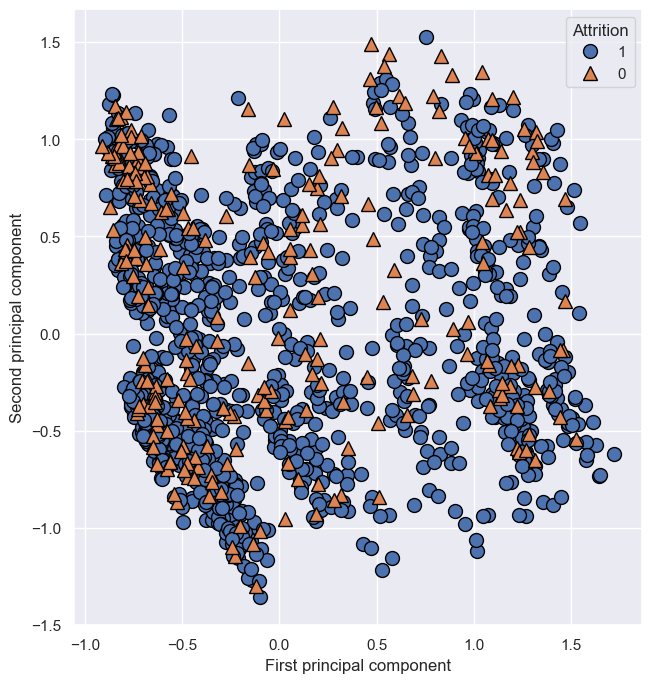

In [110]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
scatter = mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_encoded['Attrition'])
plt.legend(scatter, df_encoded['Attrition'].unique(), title="Attrition", loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [111]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 2.8221e-02  1.5913e-02  1.7172e-02 -5.2210e-03  1.3850e-02  1.4571e-03
   1.0562e-01  2.5080e-03  1.0327e-01  8.7592e-03  3.4703e-02 -7.9427e-03
  -1.1859e-02 -4.6531e-03  8.4739e-03  5.3592e-02  4.1158e-03  1.3516e-02
   6.1101e-02  5.2661e-02  6.7117e-02  4.6870e-02  2.8221e-02  1.8282e-02
  -6.0493e-03 -1.2233e-02  3.7192e-02 -5.7142e-01  5.3423e-01  7.9152e-03
  -8.3815e-02  1.9478e-01 -1.0613e-01 -6.0515e-03 -6.6968e-03 -4.9948e-02
   9.0097e-03 -1.8184e-01  2.3104e-02 -5.2396e-02 -2.2596e-02 -2.1319e-01
   4.4053e-01  4.7325e-02 -2.9461e-02  6.5967e-02 -3.6506e-02]
 [-9.9549e-02 -7.2812e-03 -1.3699e-02 -8.6319e-03 -1.2452e-02 -1.0094e-02
  -1.4844e-01  2.3889e-02 -1.5559e-01 -3.7869e-02  1.8580e-03 -9.8559e-03
  -1.2258e-02  6.2835e-03 -1.4767e-01 -1.5114e-01  1.5918e-02 -8.5032e-03
  -1.1558e-01 -9.6577e-02 -1.2958e-01 -9.0992e-02 -9.9549e-02  2.2891e-02
   8.5365e-02 -1.0826e-01 -7.3768e-03 -1.0905e-01  1.1643e-01  9.8443e-05
  -7.8862e-02  2.7267e-02  4.4635

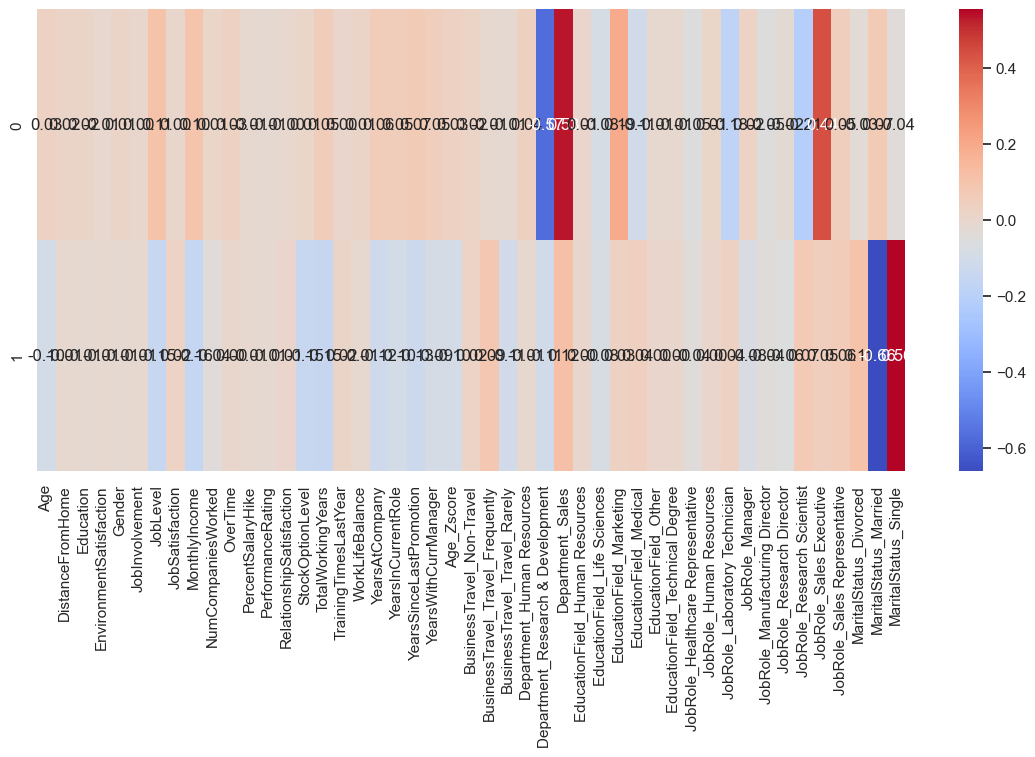

In [112]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns=X.columns)

plt.figure(figsize=(14, 6))

# Plotting heatmap
sns.heatmap(df_comp, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

# Machine Learning

# Decision Tree

In [113]:

from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree


In [114]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=0)
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


[[239   8]
 [ 43   4]] 

Accuracy: 0.826530612244898
Precision: 0.3333333333333333
Recall: 0.0851063829787234


In [115]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

In [116]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.8333333333333334
Accuracy: 0.83


In [117]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[244,   3],
       [ 46,   1]], dtype=int64)

In [118]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8333333333333334
precision 0.25
recall 0.02127659574468085


# Grid Search to find optimal parameters

In [119]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.pipeline import Pipeline

# Create a pipeline with PCA and Decision Tree Classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Set up GridSearchCV with the pipeline
folds = KFold(n_splits=5, shuffle=True, random_state=4)

hyper_params = {
    'pca__n_components': [2],  # Since we want 2 components
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_cv = GridSearchCV(estimator=pipeline,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=2,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_s

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classif

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, pca__n_components=2; total time=   0.0s
[CV] END classifi

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=2)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'pca__n_components': [2]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [120]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.012446      0.002271         0.002031        0.000323   
1        0.013402      0.001919         0.002112        0.000215   
2        0.012300      0.002168         0.002890        0.001097   
3        0.011801      0.001949         0.002128        0.000647   
4        0.014411      0.003258         0.003165        0.001093   
5        0.012617      0.001649         0.002438        0.000498   
6        0.012436      0.001287         0.003062        0.000079   
7        0.011318      0.001054         0.002314        0.000253   
8        0.012115      0.001388         0.002794        0.000555   
9        0.011884      0.001155         0.002048        0.000475   
10       0.010223      0.000940         0.001918        0.000164   
11       0.012751      0.000632         0.003025        0.000309   
12       0.011395      0.000773         0.002451        0.000236   
13       0.010646      0.001304         0.002232        0.000320   
14       0.010748      0.000751         0.002386        0.000282   
15       0.010781      0.000863         0.002352        0.000601   
16       0.010565      0.000934         0.002359        0.000609   
17       0.010272      0.001174         0.002228        0.000248   
18       0.013715      0.001502         0.002188        0.000095   
19       0.013706      0.000360         0.002723        0.000430   
20       0.011643      0.001737         0.002289        0.000365   
21       0.014114      0.000911         0.002951        0.000350   
22       0.015424      0.002244         0.003126        0.000581   
23       0.013486      0.001404         0.002402        0.000462   
24       0.012506      0.001048         0.002624        0.000364   
25       0.011886      0.001797         0.002904        0.000829   
26       0.010859      0.000819         0.002123        0.000147   
27       0.013437      0.000647         0.002570        0.000329   
28       0.012169      0.001448         0.002518        0.000535   
29       0.011962      0.001237         0.002999        0.000530   
30       0.011756      0.001769         0.002159        0.000184   
31       0.011796      0.001640         0.002439        0.000269   
32       0.013268      0.000996         0.002303        0.000468   
33       0.010739      0.000965         0.002098        0.000848   
34       0.011169      0.001115         0.002090        0.000111   
35       0.012054      0.000750         0.002539        0.000443   

   param_classifier__max_depth param_classifier__min_samples_leaf  \
0                         None                                  1   
1                         None                                  1   
2                         None                                  1   
3                         None                                  2   
4                         None                                  2   
5                         None                                  2   
6                         None                                  4   
7                         None                                  4   
8                         None                                  4   
9                           10                                  1   
10                          10                                  1   
11                          10                                  1   
12                          10                                  2   
13                          10                                  2   
14                          10                                  2   
15                          10                                  4   
16                          10                                  4   
17                          10                                  4   
18                          20                                  1   
19                          20                                  1   
20                          20        

KeyError: 'param_max_depth'

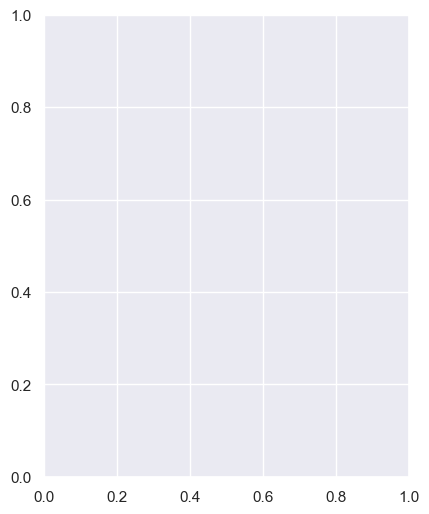

In [121]:
# Adjusted plotting for PCA
plt.figure(figsize=(16, 6))

# subplot 1/3
plt.subplot(131)
max_depth_10_pca = cv_results[(cv_results['param_max_depth'] == 10) & (cv_results['param_min_samples_leaf'] == 2)]

plt.plot(max_depth_10_pca["param_min_samples_split"], max_depth_10_pca["mean_test_score"])
plt.plot(max_depth_10_pca["param_min_samples_split"], max_depth_10_pca["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 10")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
max_depth_20_pca = cv_results[(cv_results['param_max_depth'] == 20) & (cv_results['param_min_samples_leaf'] == 2)]

plt.plot(max_depth_20_pca["param_min_samples_split"], max_depth_20_pca["mean_test_score"])
plt.plot(max_depth_20_pca["param_min_samples_split"], max_depth_20_pca["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 20")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
max_depth_30_pca = cv_results[(cv_results['param_max_depth'] == 30) & (cv_results['param_min_samples_leaf'] == 2)]

plt.plot(max_depth_30_pca["param_min_samples_split"], max_depth_30_pca["mean_test_score"])
plt.plot(max_depth_30_pca["param_min_samples_split"], max_depth_30_pca["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 30")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Use the actual best hyperparameters from GridSearchCV
best_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 4,  
    "random_state": 0
}

# Model using the best hyperparameters
model = DecisionTreeClassifier(**best_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))



In [ ]:
# Perform cross-validation for Accuracy on the PCA-transformed data
cross_val_results = cross_val_score(estimator=dt_classifier, X=X_train_pca, y=y_train, cv=10, scoring='accuracy')

# Fit the model on the training data (if needed)
dt_classifier.fit(X_train_pca, y_train)

# Print the cross-validation results
print("Cross-Validation Accuracy scores:")
print(cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())


In [ ]:
feature_importances = dt_classifier.feature_importances_

feature_names_mapping = dict(zip(range(len(X.columns)), X.columns))


important_features = [feature_names_mapping[i] for i in range(len(feature_importances))]
print("Most Important Feature:", important_features[feature_importances.argmax()])

In [ ]:
# Making predictions on the testing set
y_pred = dt_classifier.predict(X_test_pca)
type(y_pred)

In [ ]:

c = [i for i in range(1, len(y_test)+1)]  
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)  
plt.xlabel('Index', fontsize=18) 
plt.ylabel('Count', fontsize=16)  
plt.legend()
plt.show()


In [ ]:

c = [i for i in range(1, len(y_test)+1)]  
fig = plt.figure()
plt.plot(c, y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18) 
plt.ylabel('y_test - y_pred', fontsize=16)  
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = dt_classifier.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Attrition")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X_train_pca, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
clf_RF = RandomForestClassifier(n_estimators = 100)

clf_RF.fit(X_train_pca, y_train)

y_pred = clf_RF.predict(X_test_pca)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=0))
])

# Set up GridSearchCV with the pipeline
folds = KFold(n_splits=5, shuffle=True, random_state=4)

hyper_params = {
    'classifier__n_estimators': [50, 100, 200],  # Choose appropriate values
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_cv = GridSearchCV(estimator=pipeline,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=2,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)




In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
print(cv_results.keys())

In [ ]:
plt.figure(figsize=(16, 6))

# subplot 1/3
plt.subplot(131)
max_depth_10_no_pca_rf = cv_results[(cv_results['param_classifier__max_depth'] == 10) & (cv_results['param_classifier__min_samples_leaf'] == 2)]

plt.plot(max_depth_10_no_pca_rf["param_classifier__min_samples_split"], max_depth_10_no_pca_rf["mean_test_score"])
plt.plot(max_depth_10_no_pca_rf["param_classifier__min_samples_split"], max_depth_10_no_pca_rf["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 10")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
max_depth_20_no_pca_rf = cv_results[(cv_results['param_classifier__max_depth'] == 20) & (cv_results['param_classifier__min_samples_leaf'] == 2)]

plt.plot(max_depth_20_no_pca_rf["param_classifier__min_samples_split"], max_depth_20_no_pca_rf["mean_test_score"])
plt.plot(max_depth_20_no_pca_rf["param_classifier__min_samples_split"], max_depth_20_no_pca_rf["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 20")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
max_depth_30_no_pca_rf = cv_results[(cv_results['param_classifier__max_depth'] == 30) & (cv_results['param_classifier__min_samples_leaf'] == 2)]

plt.plot(max_depth_30_no_pca_rf["param_classifier__min_samples_split"], max_depth_30_no_pca_rf["mean_test_score"])
plt.plot(max_depth_30_no_pca_rf["param_classifier__min_samples_split"], max_depth_30_no_pca_rf["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 30")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Use the actual best hyperparameters from GridSearchCV
best_params = {
    "max_depth": None,
    "min_samples_split": 5,
    "min_samples_leaf": 2,  
    "random_state": 0
}

# Model using the best hyperparameters
model = DecisionTreeClassifier(**best_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


In [ ]:

cross_val_results = cross_val_score(estimator=dt_classifier, X=X_train, y=y_train, cv=10, scoring='accuracy')

dt_classifier.fit(X_train, y_train)

print("Cross-Validation Accuracy scores:")
print(cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())


In [ ]:
feature_importances = dt_classifier.feature_importances_

feature_names_mapping = dict(zip(range(len(X.columns)), X.columns))


important_features = [feature_names_mapping[i] for i in range(len(feature_importances))]
print("Most Important Feature:", important_features[feature_importances.argmax()])

In [ ]:
# Making predictions on the testing set
y_pred = dt_classifier.predict(X_test)
type(y_pred)

In [ ]:
c = [i for i in range(1, len(y_test)+1)]  
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)  
plt.xlabel('Index', fontsize=18) 
plt.ylabel('Count', fontsize=16)  
plt.legend()
plt.show()


In [ ]:
c = [i for i in range(1, len(y_test)+1)]  
fig = plt.figure()
plt.plot(c, y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18) 
plt.ylabel('y_test - y_pred', fontsize=16)  
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = dt_classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Attrition")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()